In [65]:
import os
import pandas as pd
import numpy as np
from scipy.stats import iqr
from statsmodels.formula.api import ols
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats
from statsmodels.stats.multitest import multipletests
# Create bar plot
plt.style.use('seaborn-v0_8-poster')
#plt.style.use('seaborn-v0_8')
fontsize = 11
plt.rcParams.update({
    "font.size": fontsize,          # Global font size
    "axes.labelsize": fontsize,     # X and Y axis labels
    "axes.titlesize": fontsize,     # Title (if used)
    "xtick.labelsize": fontsize,    # X-axis tick labels
    "ytick.labelsize": fontsize,    # Y-axis tick labels
    "legend.fontsize": fontsize,    # Legend font size
})

In [67]:
project_dir = '/Users/xiaoqianxiao/projects/NARSAD'
SCR_dir = os.path.join(project_dir, 'EDR')
fMRI_file = os.path.join(project_dir, 'MRI/derivatives/fMRI_analysis/groupLevel/roi_cope_results_all.csv')
df_fMRI = pd.read_csv(fMRI_file)
drug_file = os.path.join(SCR_dir, 'drug_order.csv')
ECR_file = os.path.join(SCR_dir, 'ECR.csv')
df_drug = pd.read_csv(drug_file)
df_drug['group'] = df_drug['subID'].apply(lambda x: 'Patients' if x.startswith('N1') else 'Controls')
df_ECR = pd.read_csv(ECR_file)
df_behav = df_drug.merge(df_ECR, how='left', left_on='subID', right_on='subID')

In [74]:
df_behav.columns

Index(['subID', 'Drug', 'drug_condition', 'Gender', 'gender_code', 'group',
       'ecr_q1', 'ecr_q2', 'ecr_q3', 'ecr_q4', 'ecr_q5', 'ecr_q6', 'ecr_q7',
       'ecr_q8', 'ecr_q9', 'ecr_q10', 'ecr_q11', 'ecr_q12', 'ecr_q13',
       'ecr_q14', 'ecr_q15', 'ecr_q16', 'ecr_q17', 'ecr_q18', 'ecr_q19',
       'ecr_q20', 'ecr_q21', 'ecr_q22', 'ecr_q23', 'ecr_q24', 'ecr_q25',
       'ecr_q26', 'ecr_q27', 'ecr_q28', 'ecr_q29', 'ecr_q30', 'ecr_q31',
       'ecr_q32', 'ecr_q33', 'ecr_q34', 'ecr_q35', 'ecr_q36', 'demo_age',
       'demo_sex_at_birth', 'Anxiety', 'Avoidance', 'total_score'],
      dtype='object')

In [68]:
# Define directories
root_dir = '/Users/xiaoqianxiao/projects'
project_name = 'NARSAD'

sub_no_MRI_phase2 = ['N102', 'N208']
sub_no_MRI_phase3 = ['N102', 'N208', 'N120']

SCR_dir = os.path.join(root_dir, project_name, 'EDR')
drug_file = os.path.join(SCR_dir, 'drug_order.csv')
ECR_file = os.path.join(SCR_dir, 'ECR.csv')

# Load behavioral data
df_drug = pd.read_csv(drug_file)
df_drug['group'] = df_drug['subID'].apply(lambda x: 'Patients' if x.startswith('N1') else 'Controls')
df_ECR = pd.read_csv(ECR_file)
df_behav = df_drug.merge(df_ECR, how='left', left_on='subID', right_on='subID')

group_info_df_phase2 = df_behav.loc[~df_behav['subID'].isin(sub_no_MRI_phase2)]
group_info_df_phase3 = df_behav.loc[~df_behav['subID'].isin(sub_no_MRI_phase3)]

fMRI_file = os.path.join(project_dir, 'MRI/derivatives/fMRI_analysis/groupLevel/roi_cope_results_all.csv')
df_fMRI = pd.read_csv(fMRI_file)
df_fMRI_phase2 = df_fMRI.loc[df_fMRI['Task']=='phase2'].copy()
df_fMRI_phase3 = df_fMRI.loc[df_fMRI['Task']=='phase3'].copy()


In [69]:
df_fMRI_phase2['subID'] = df_fMRI_phase2['Subject'].apply(lambda x: group_info_df_phase2.iloc[x - 1]['subID'])
df_fMRI_phase3['subID'] = df_fMRI_phase3['Subject'].apply(lambda x: group_info_df_phase3.iloc[x - 1]['subID'])
df_phase2 = df_fMRI_phase2.merge(group_info_df_phase2, how='left', left_on='subID', right_on='subID')
df_phase2 = df_phase2[df_phase2['Gender'].isin(['Female', 'Male'])].reset_index(drop=True)
df_phase3 = df_fMRI_phase3.merge(group_info_df_phase3, how='left', left_on='subID', right_on='subID')
df_phase3 = df_phase3[df_phase3['Gender'].isin(['Female', 'Male'])].reset_index(drop=True)

extinction results for hippocampus_right_mask_resampled
                            OLS Regression Results                            
Dep. Variable:                 z_fMRI   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.2430
Date:                Tue, 11 Mar 2025   Prob (F-statistic):              0.961
Time:                        11:00:15   Log-Likelihood:                -142.54
No. Observations:                 101   AIC:                             299.1
Df Residuals:                      94   BIC:                             317.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

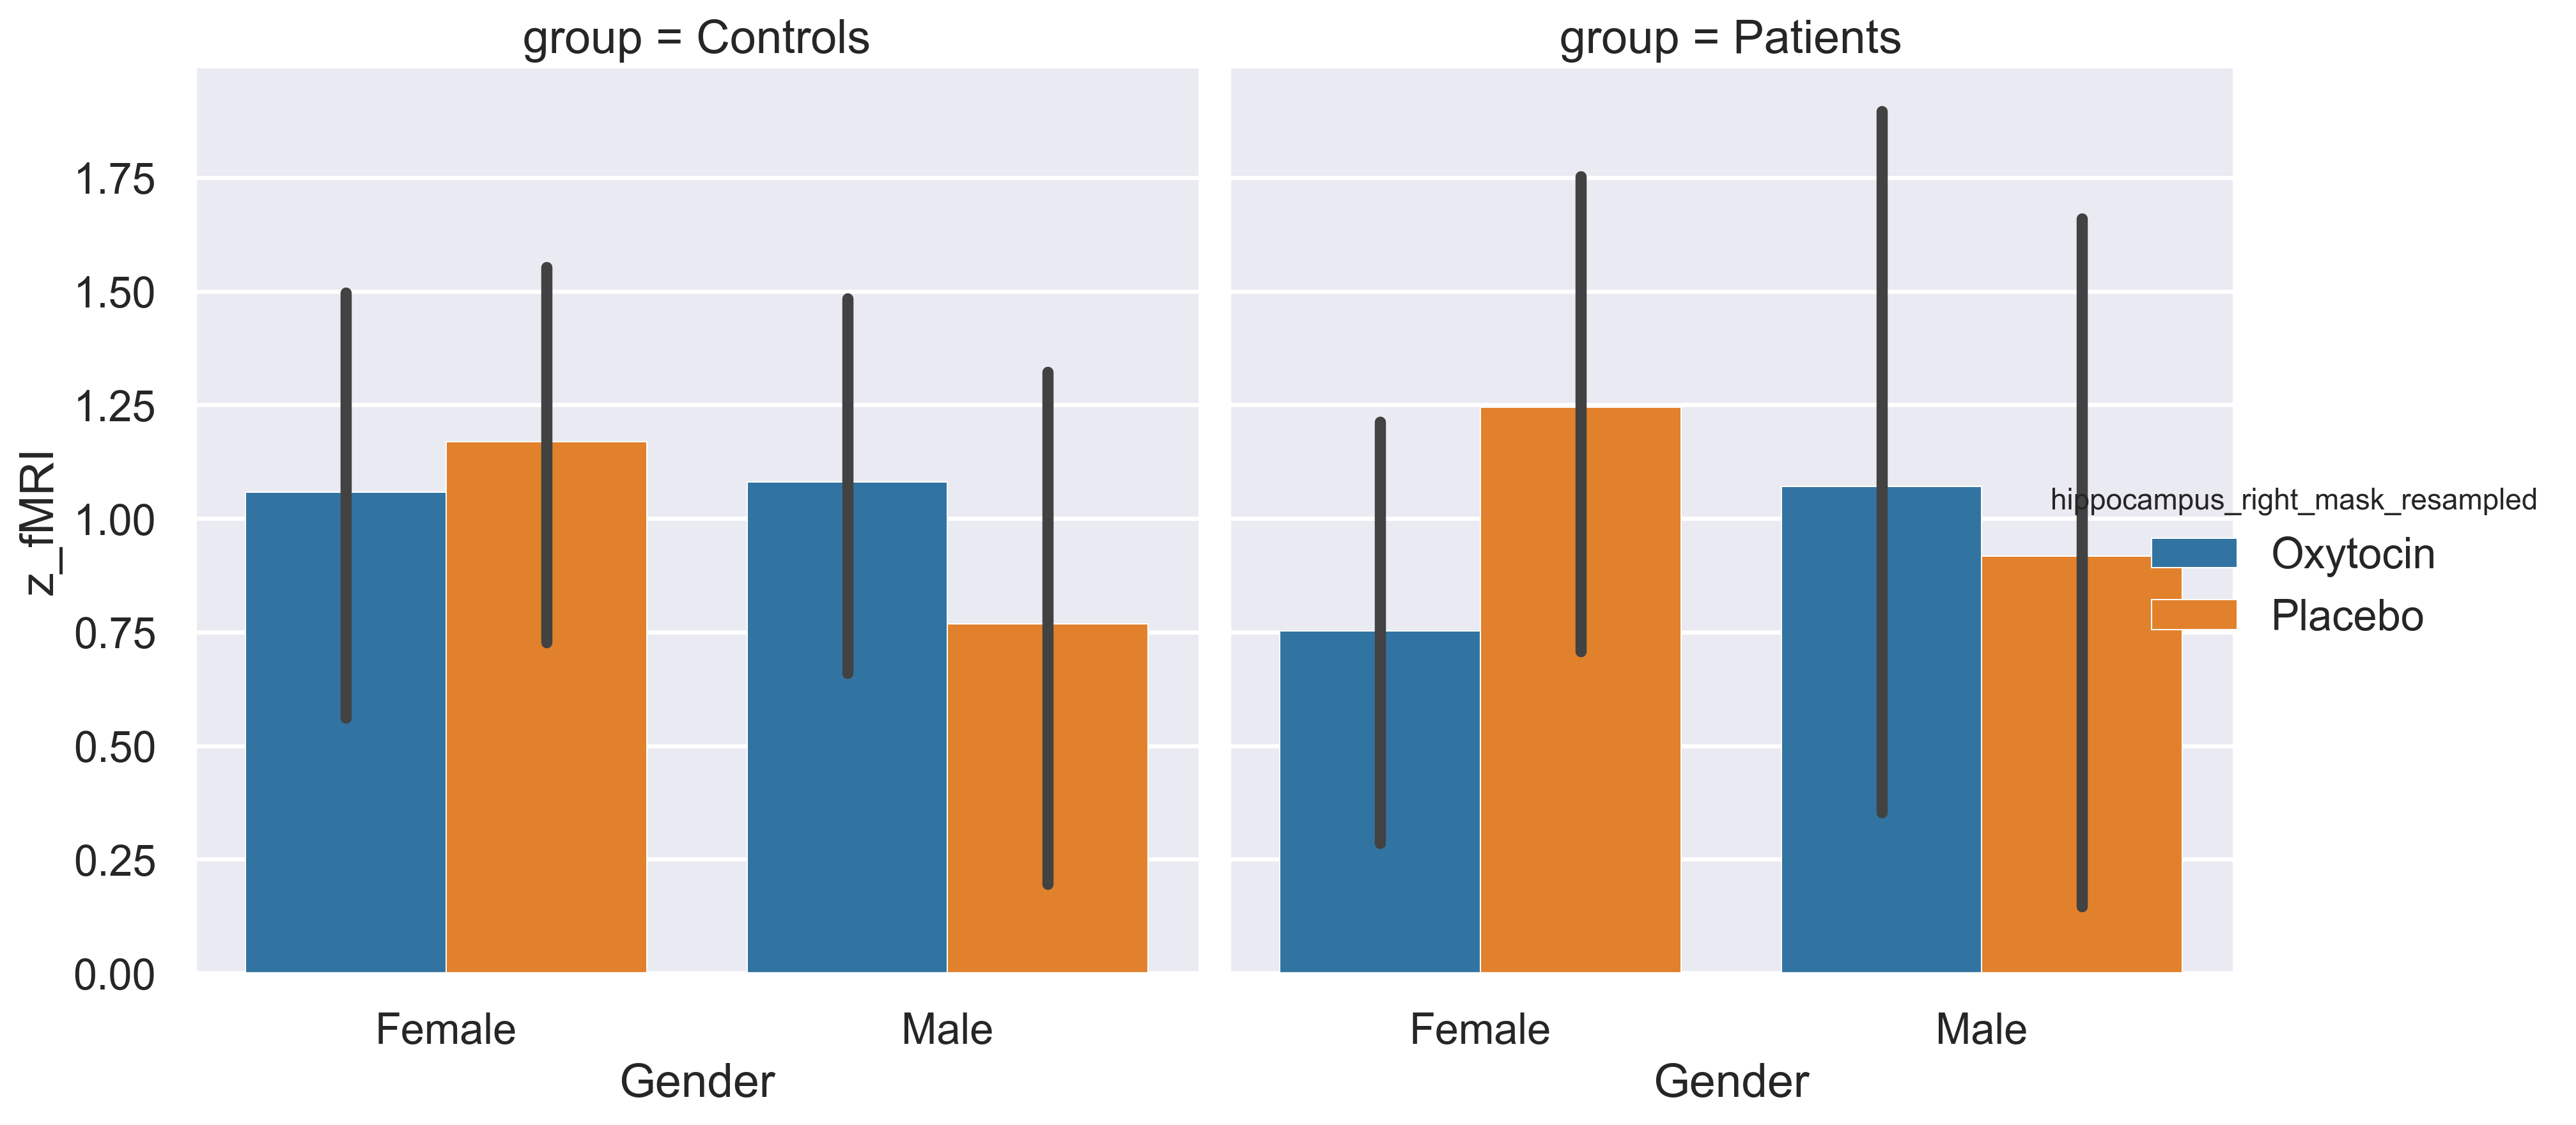

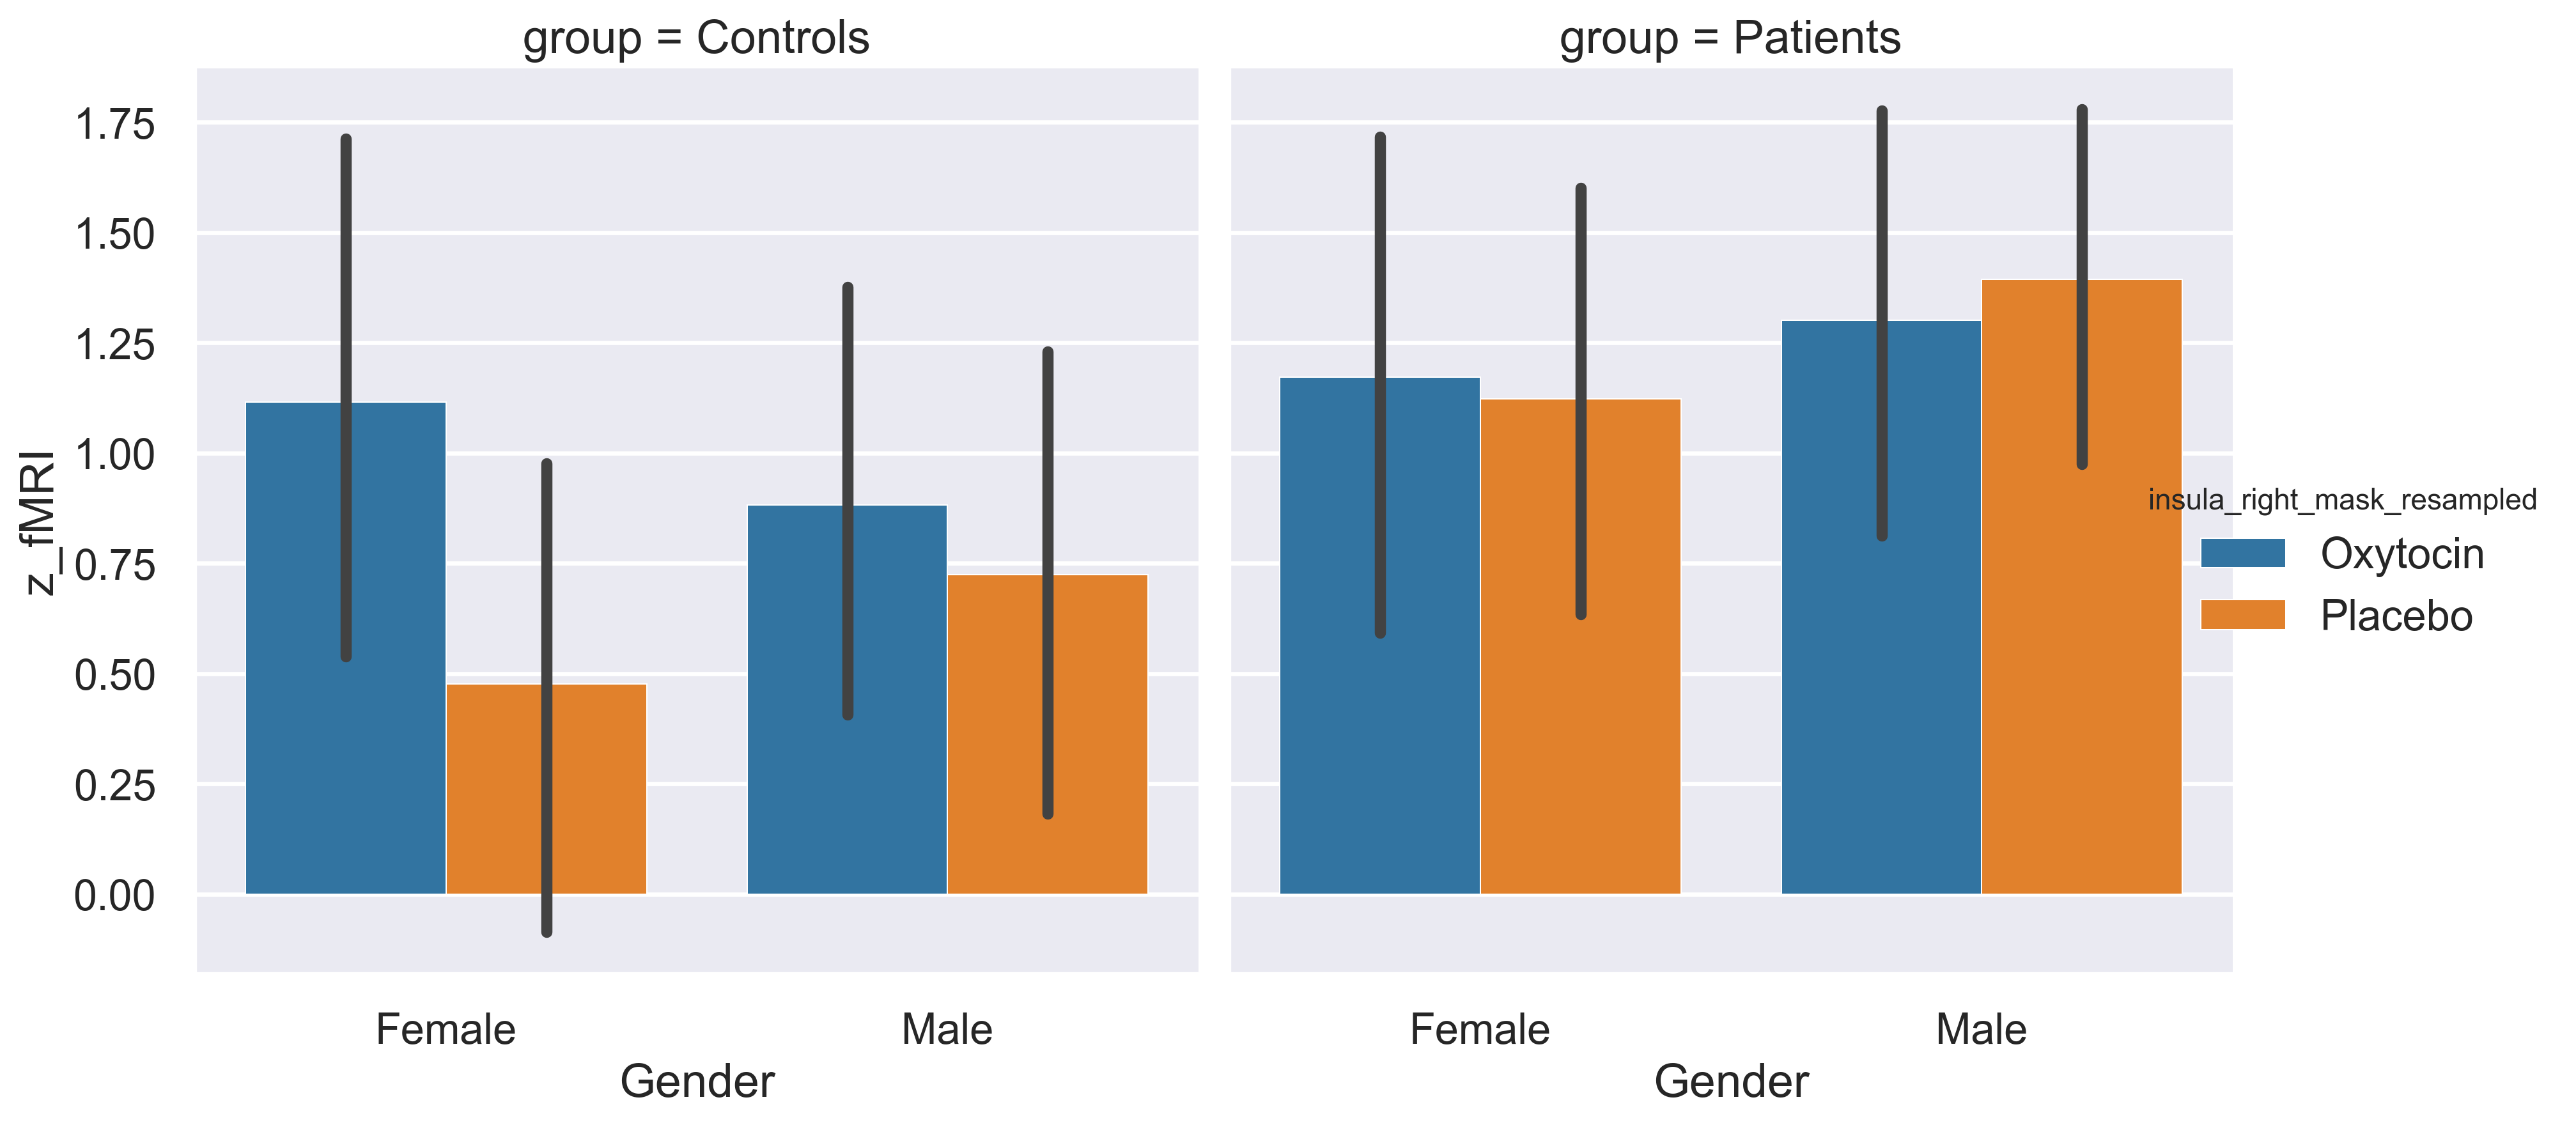

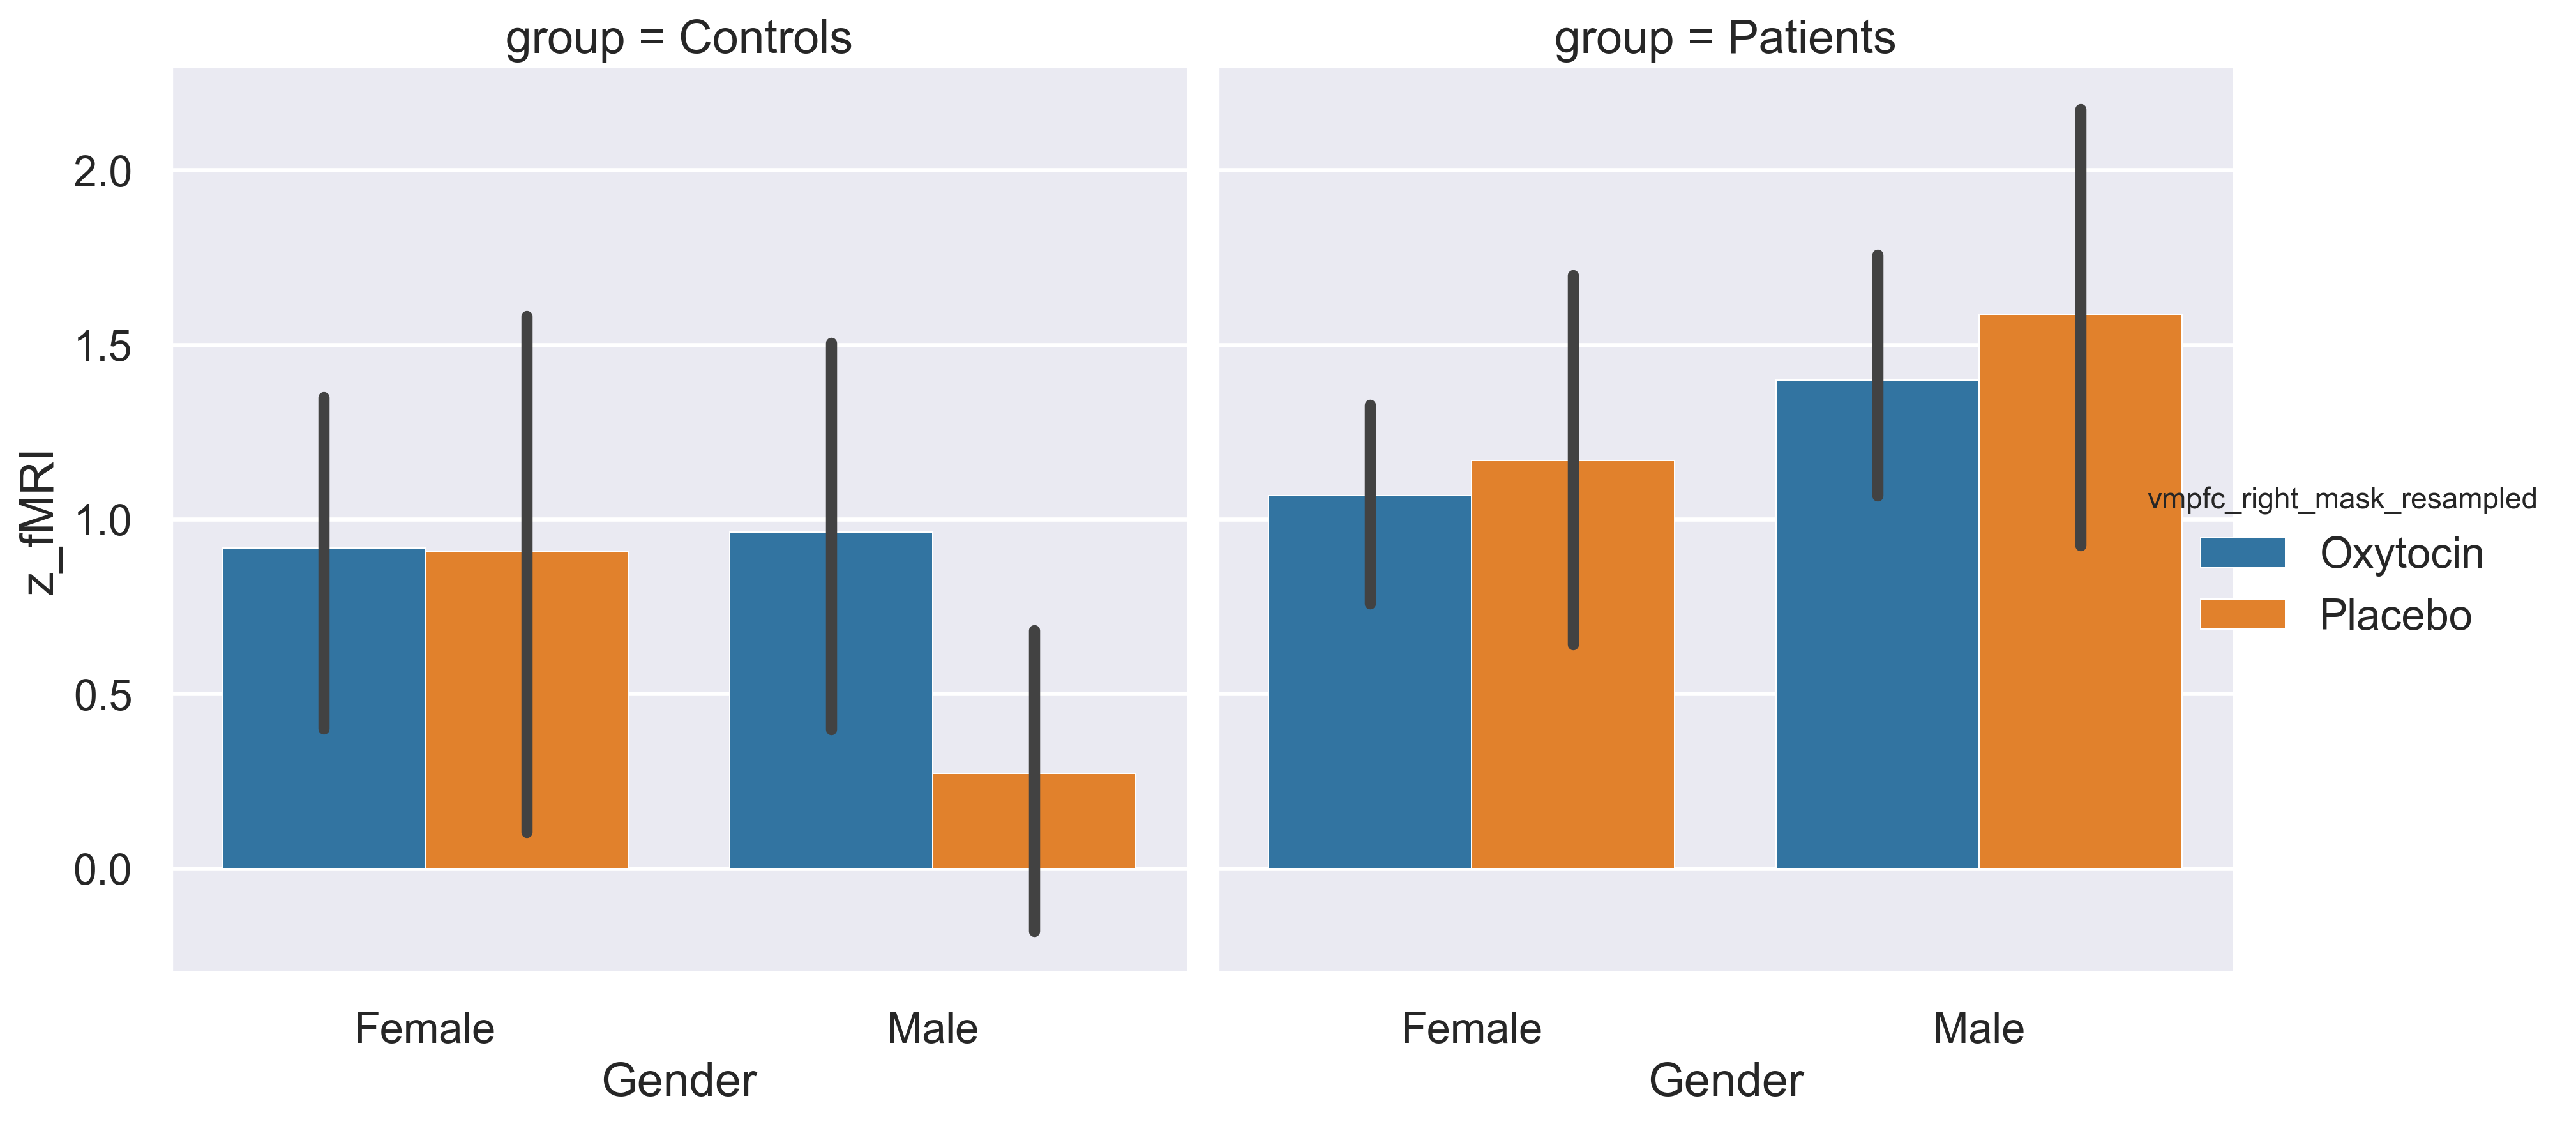

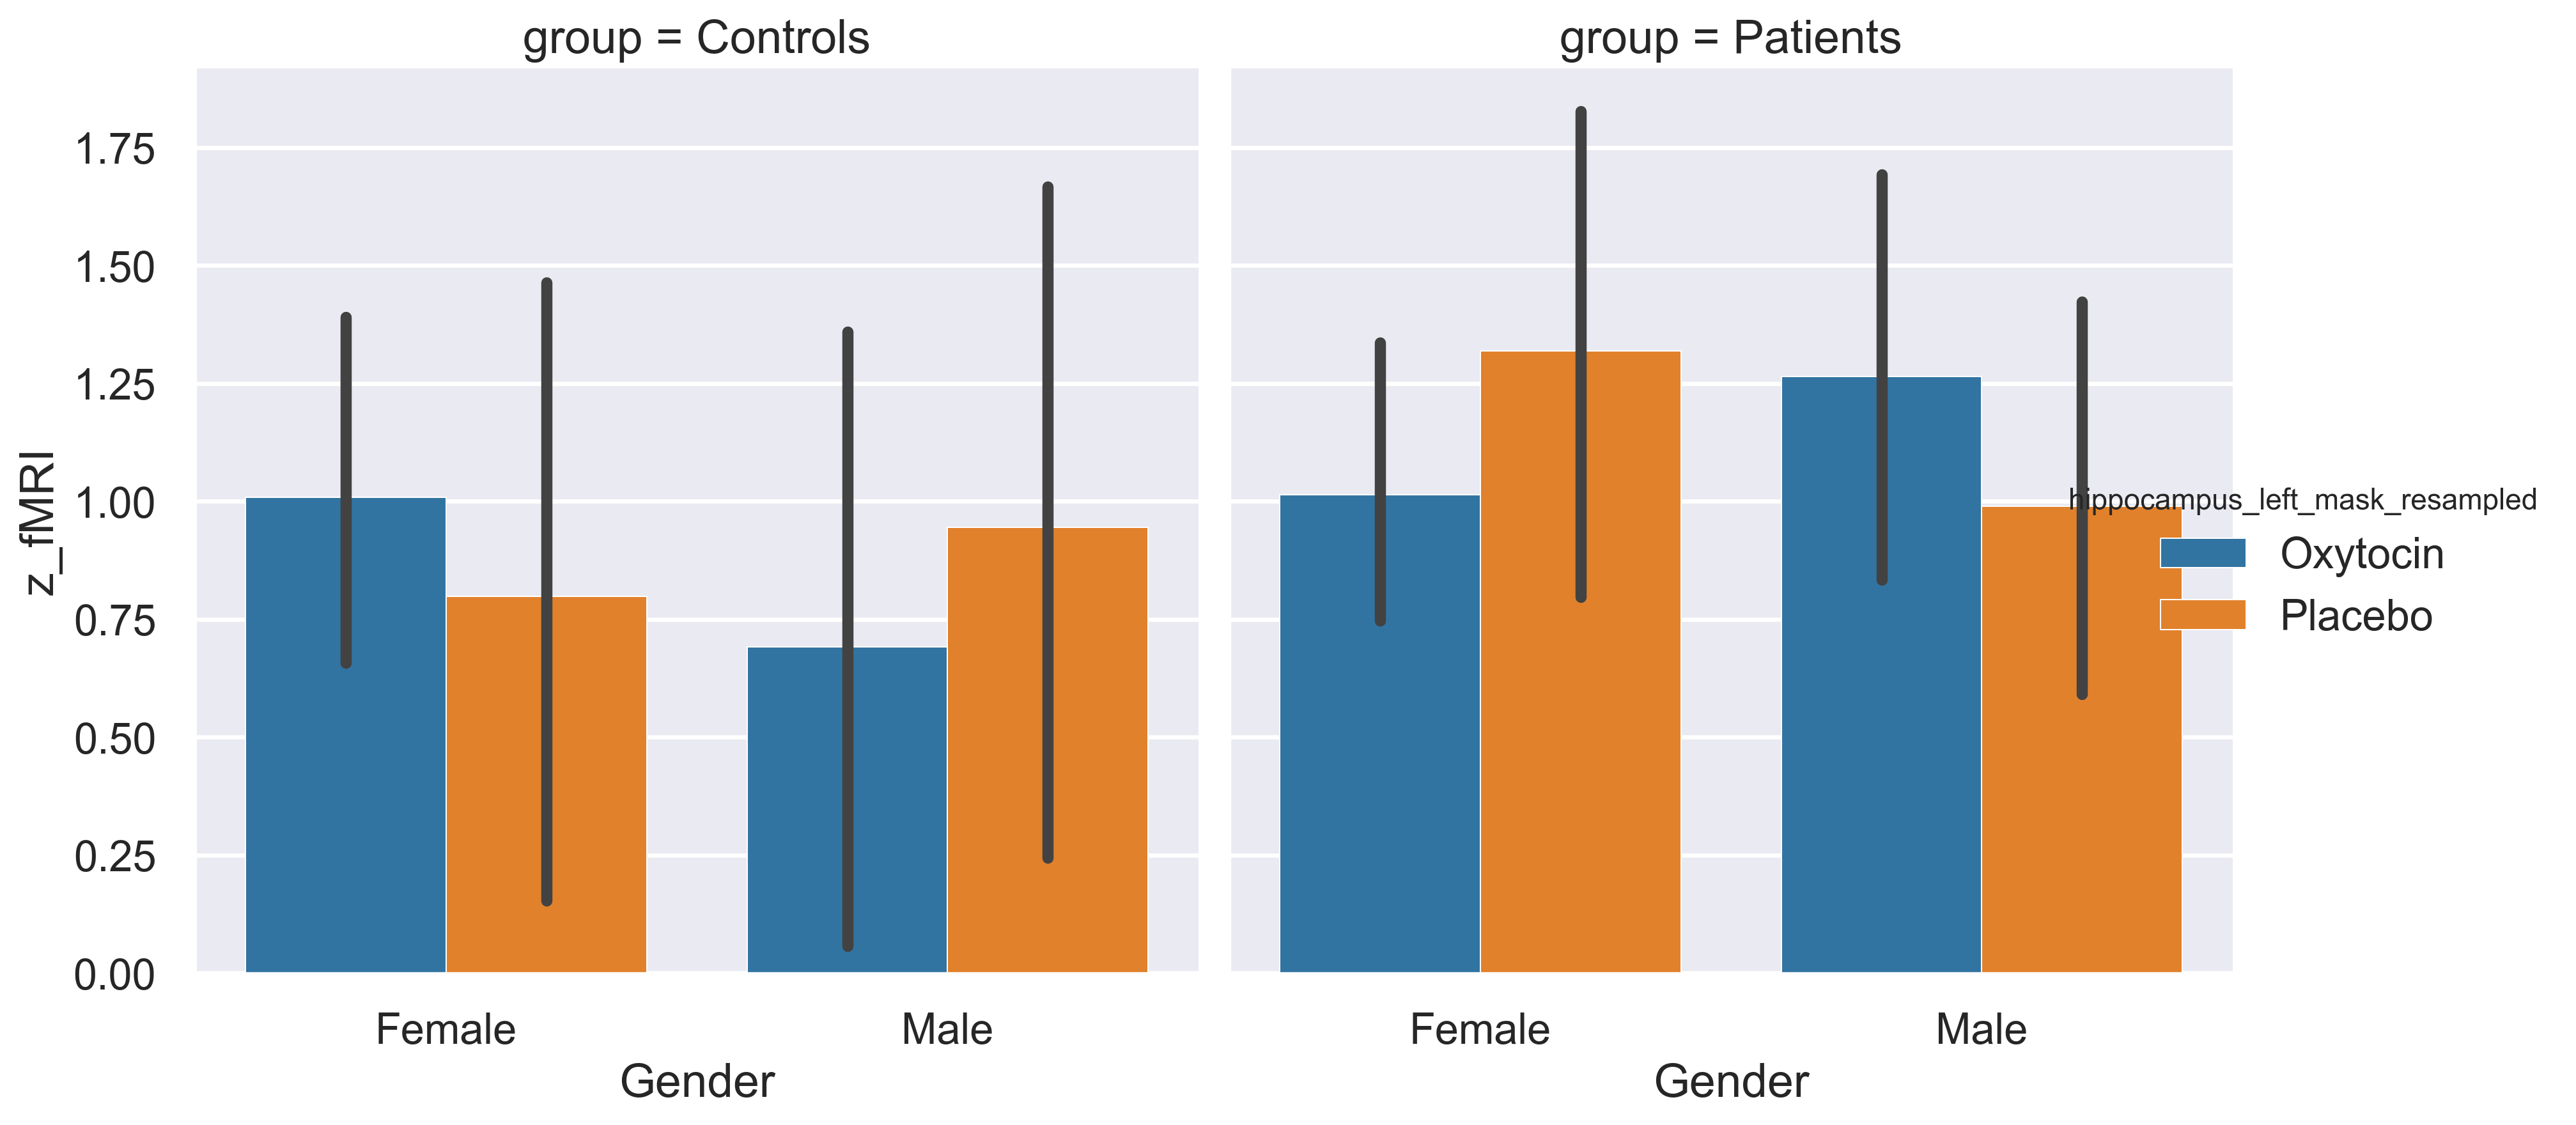

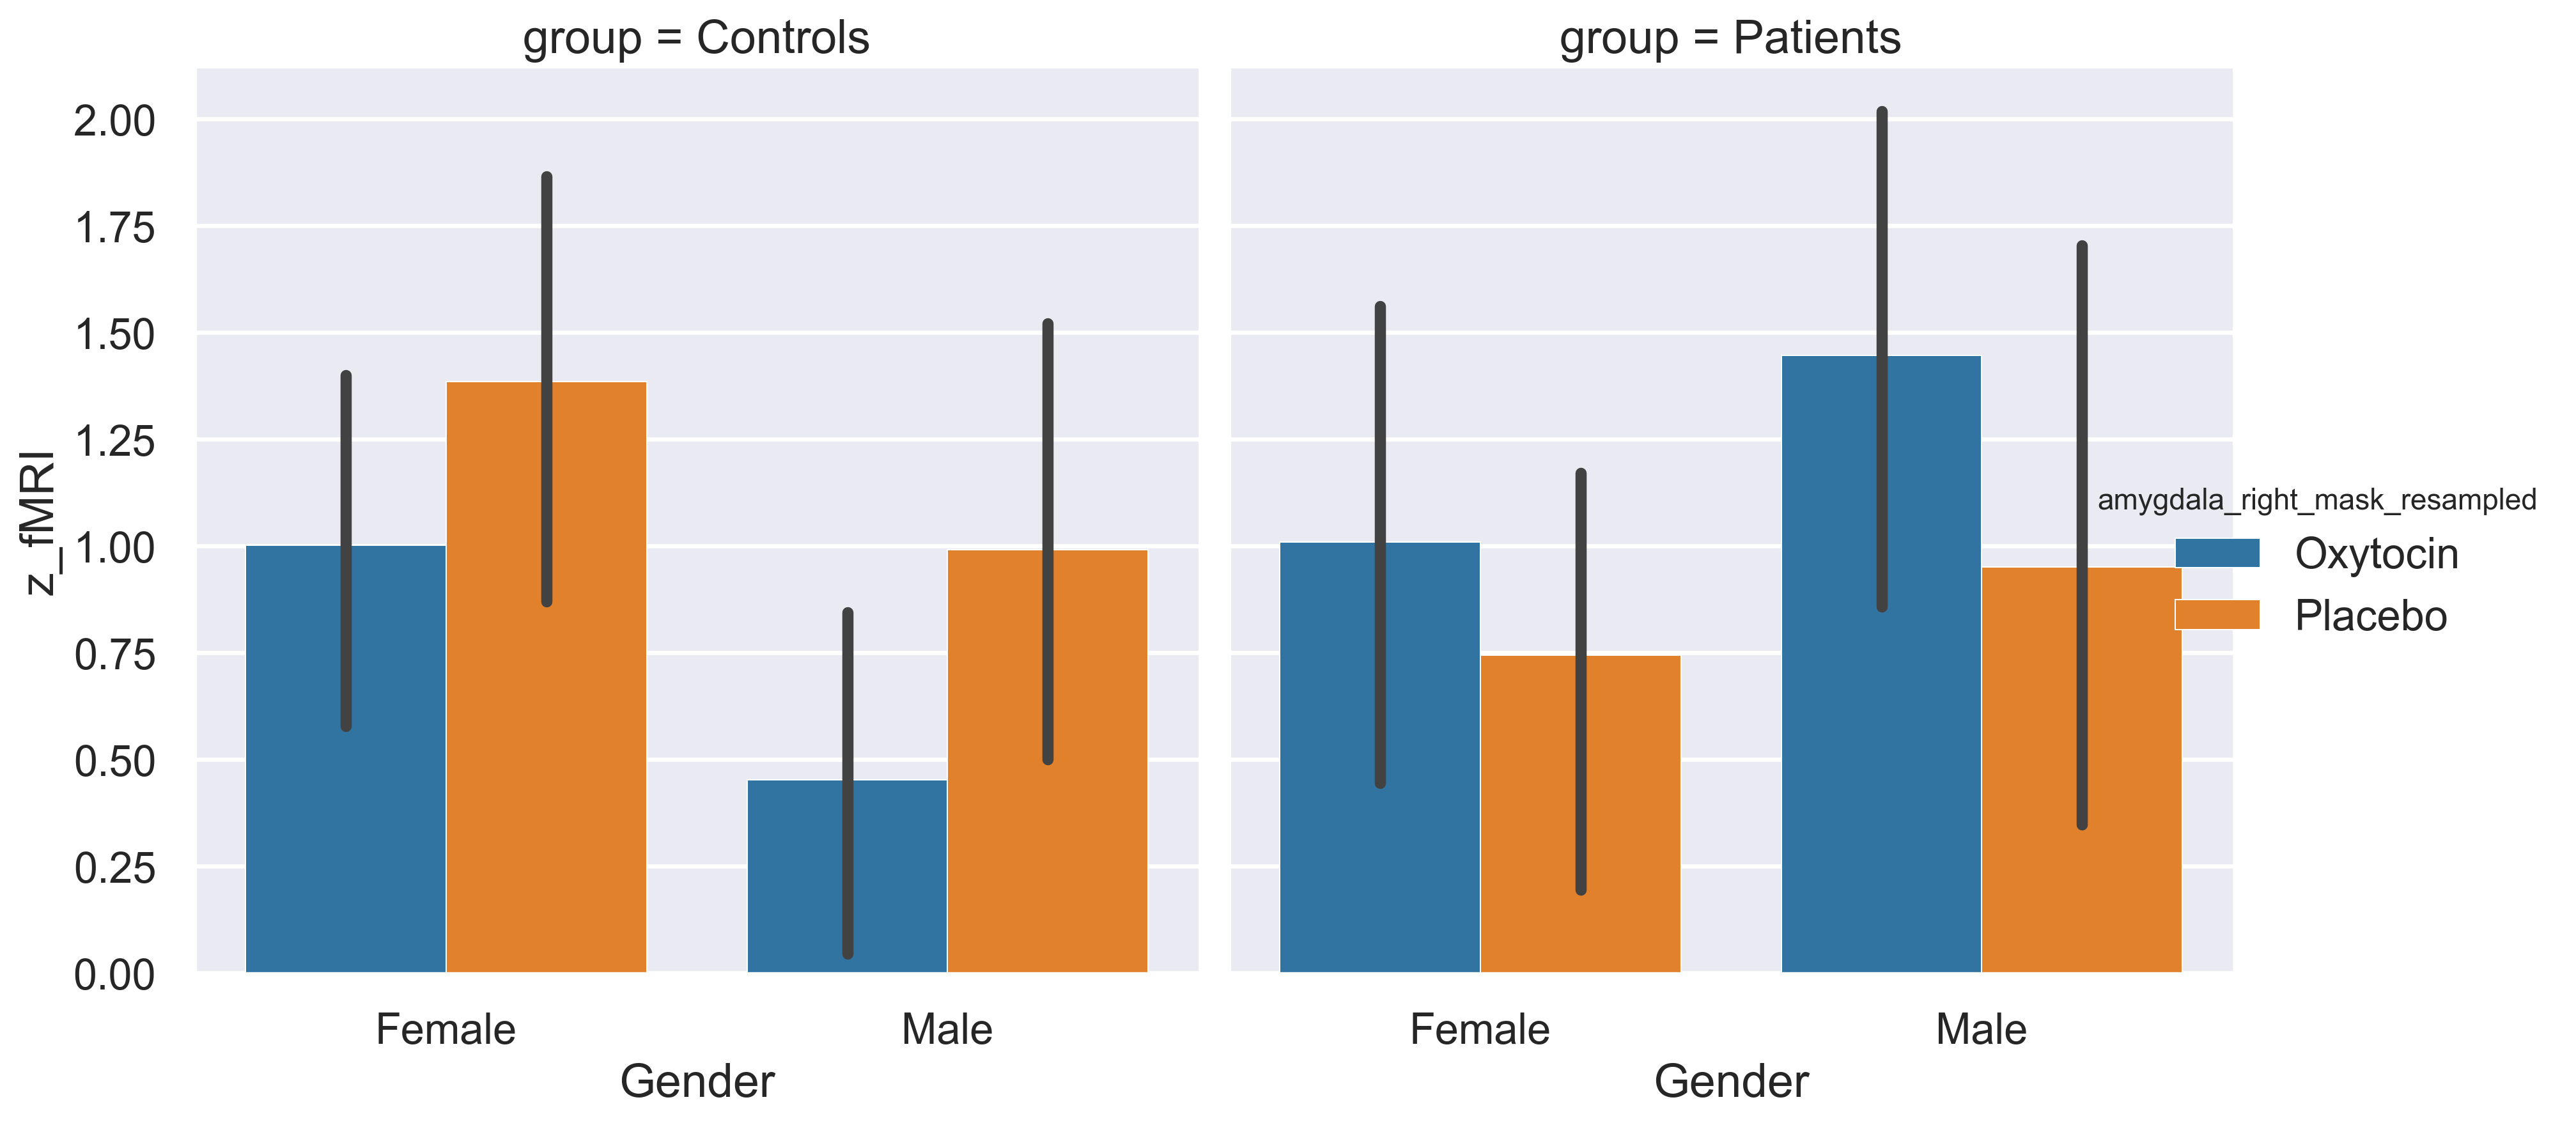

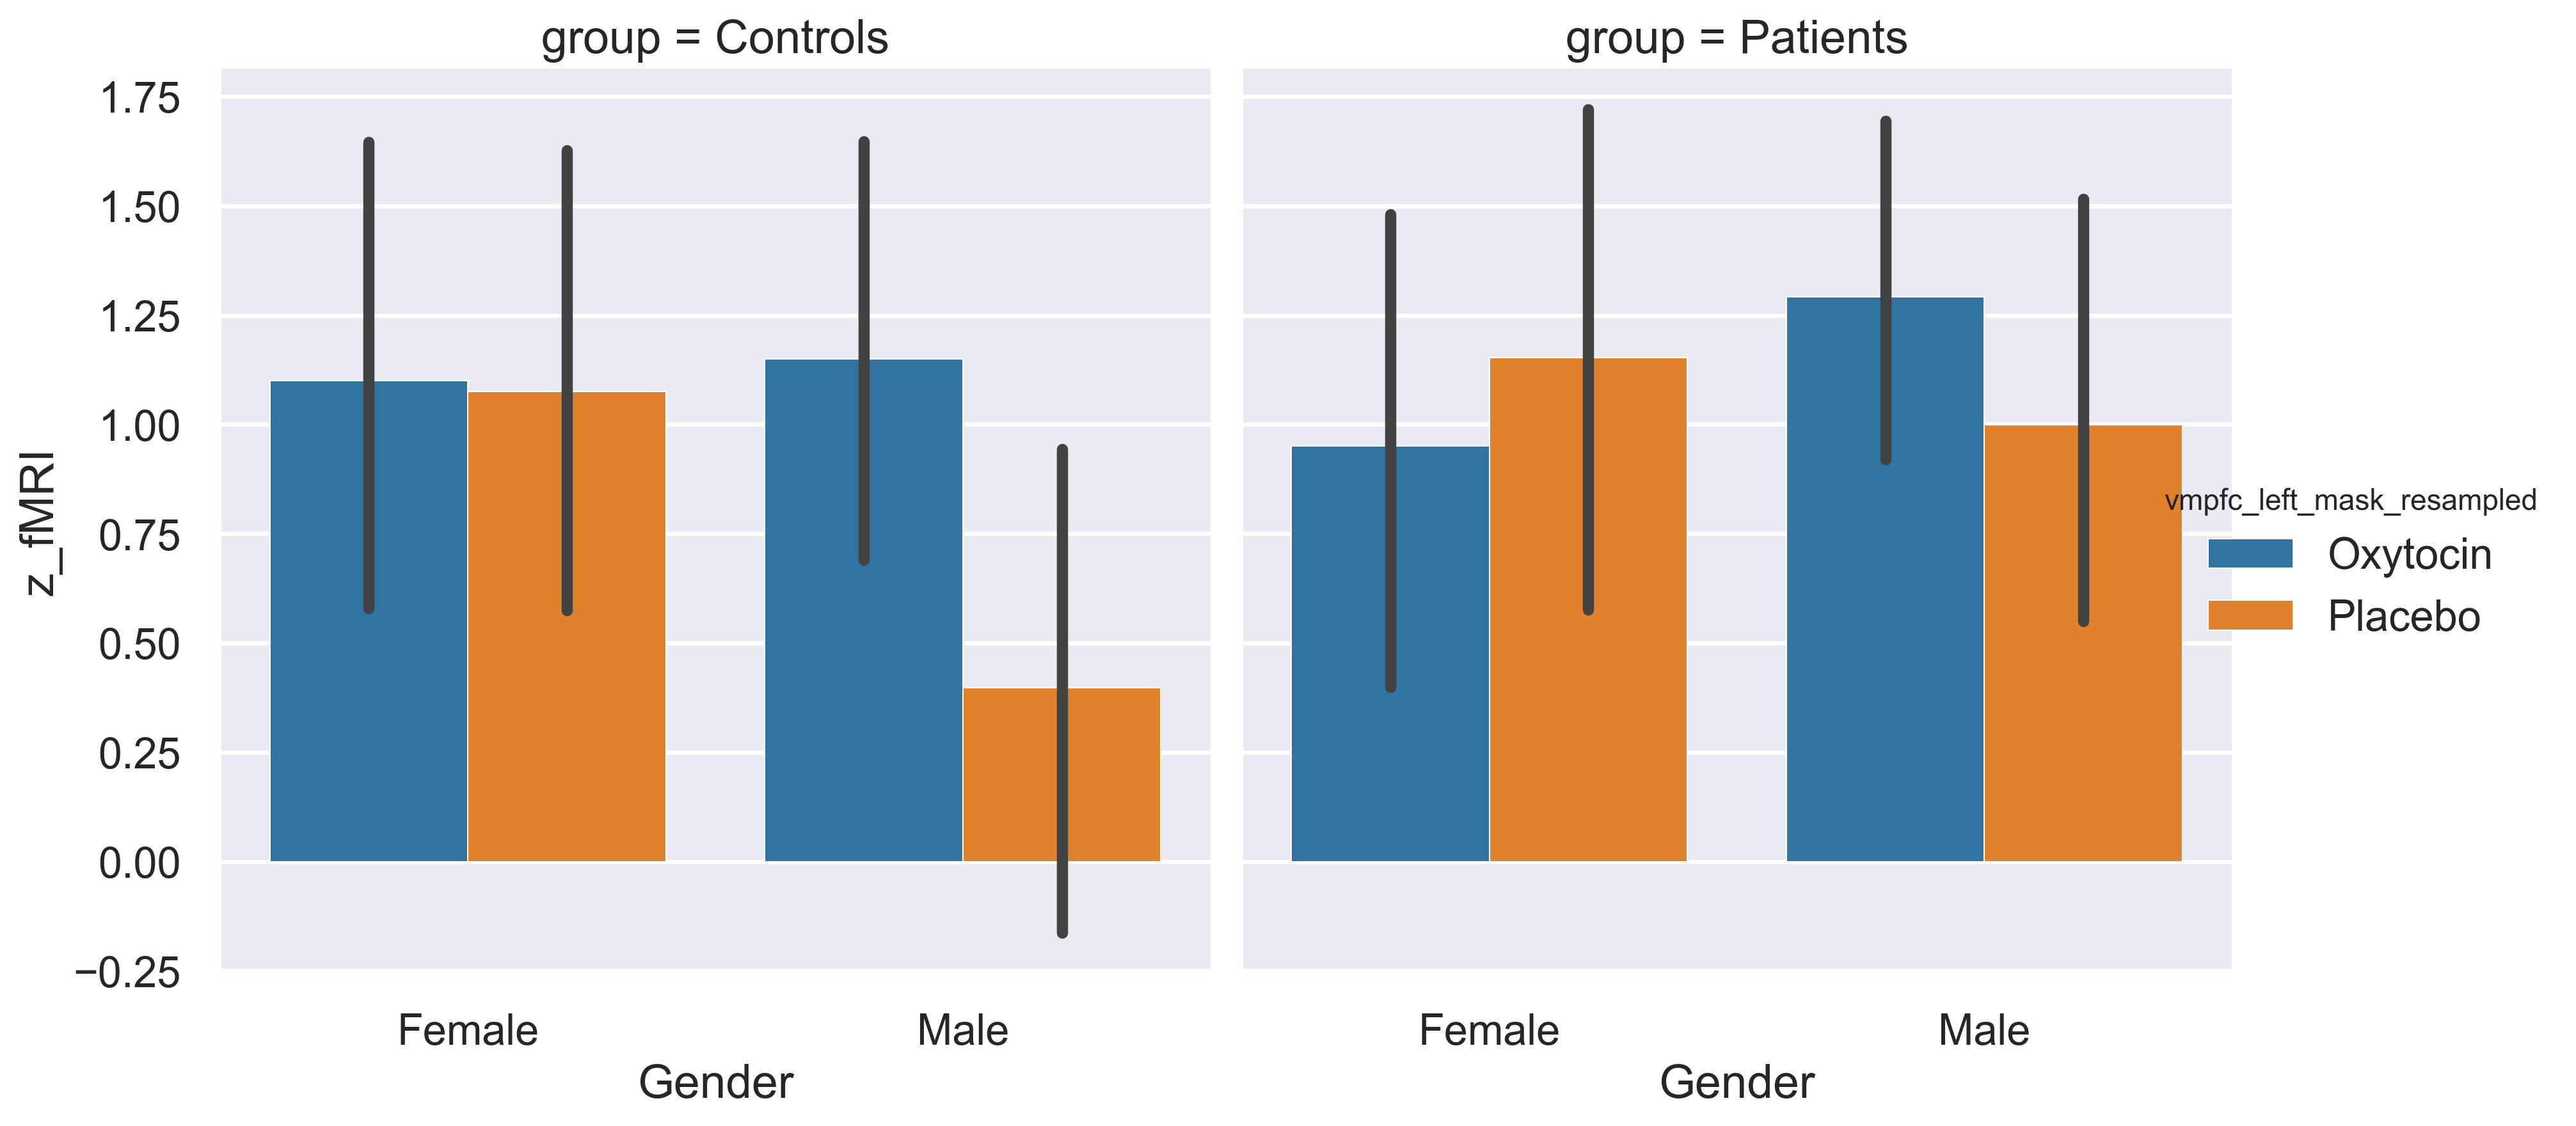

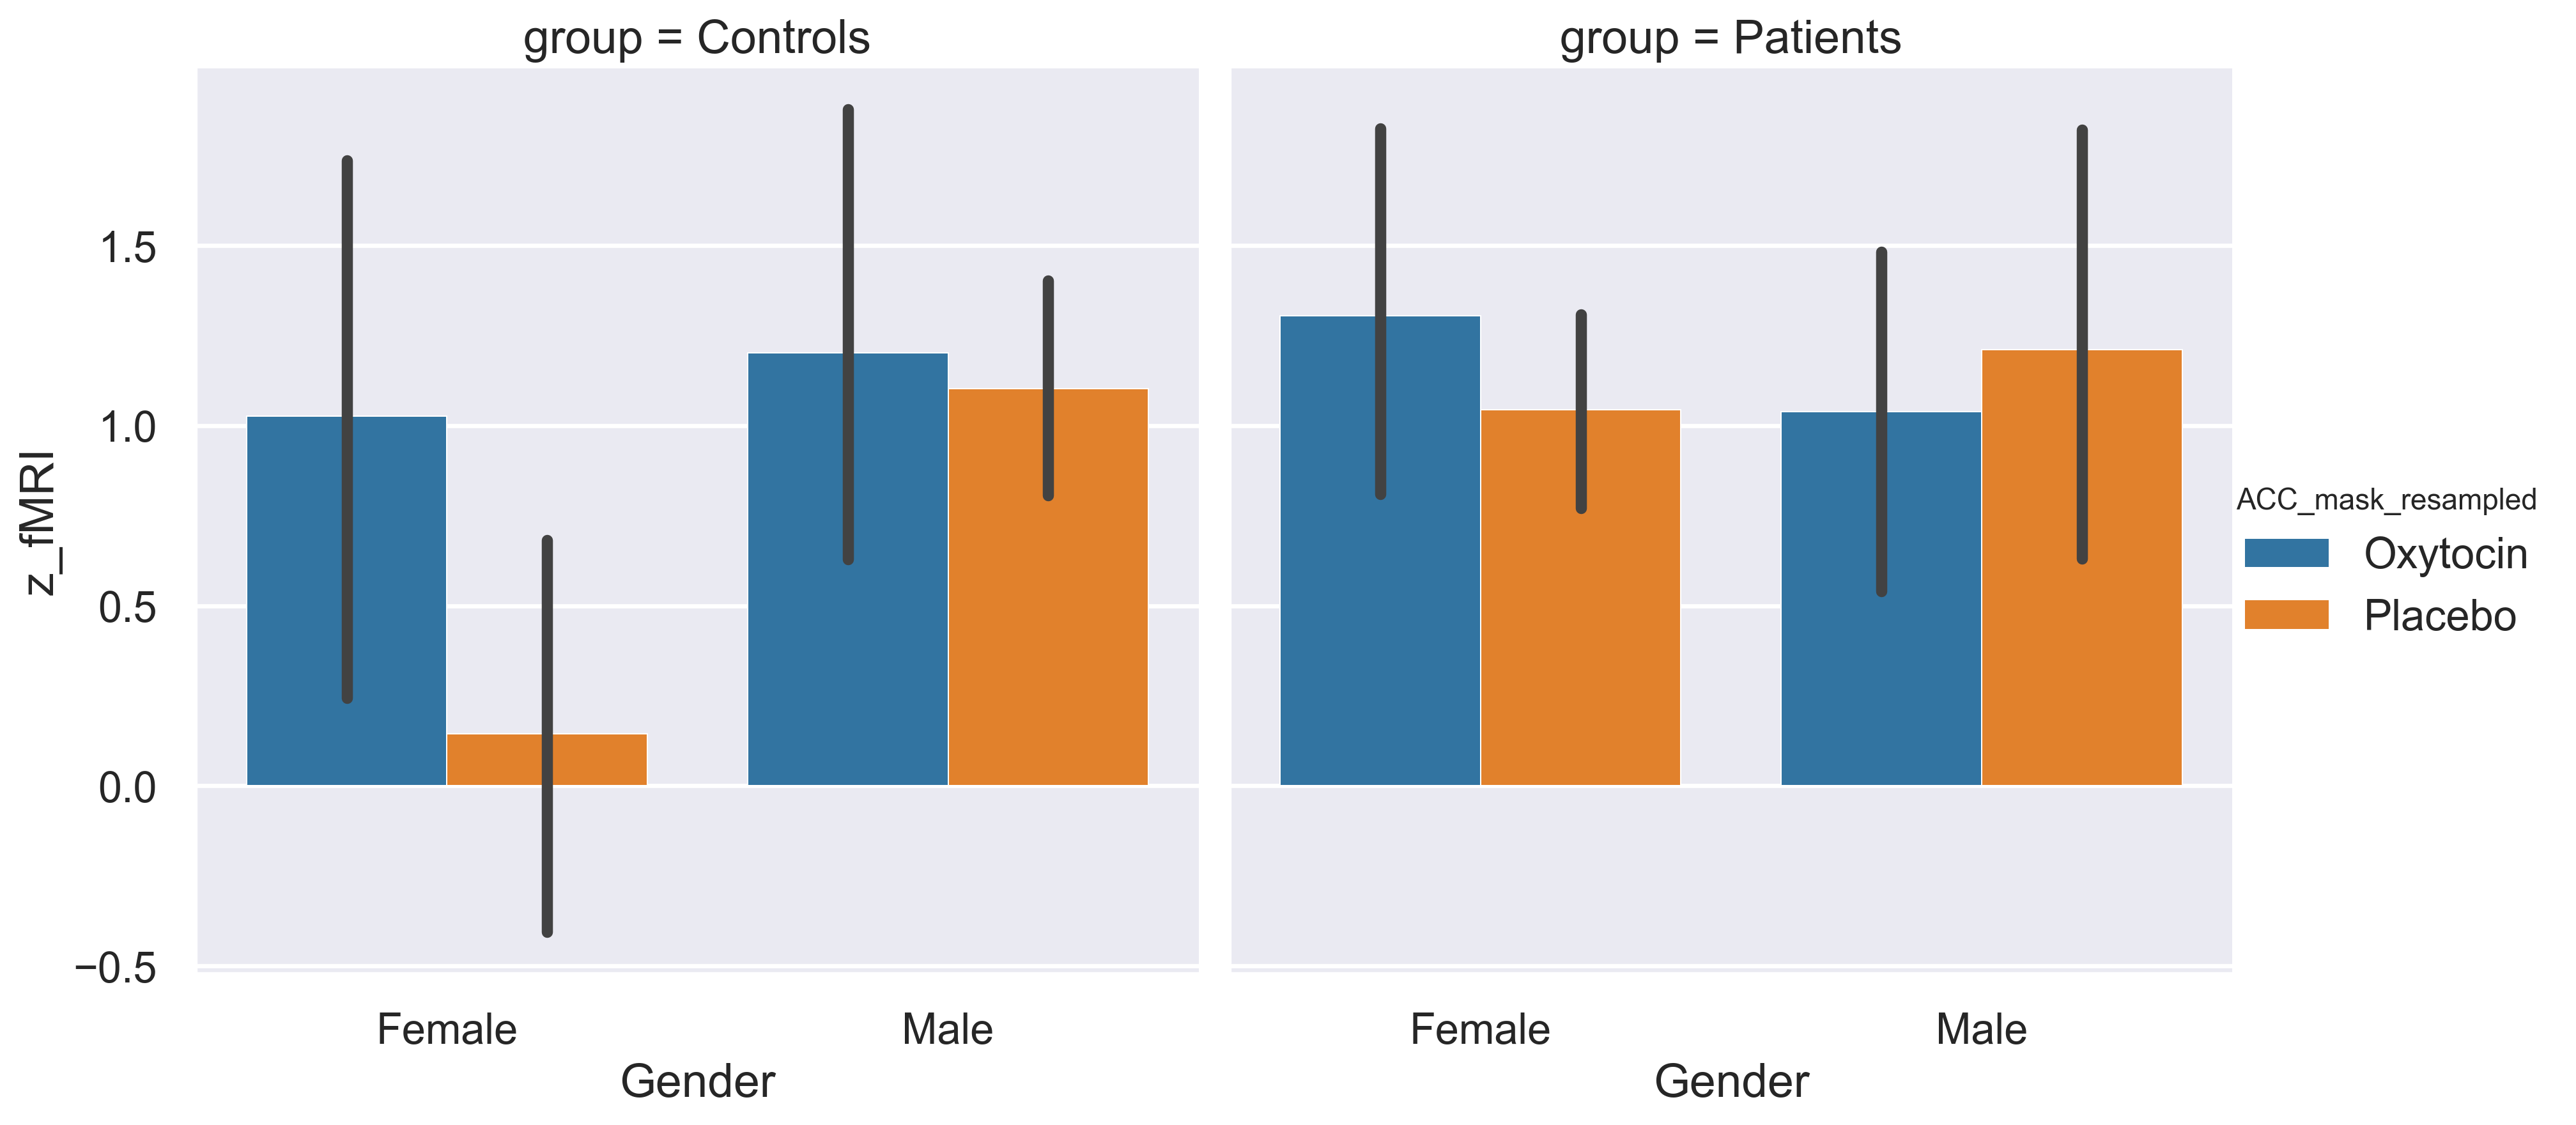

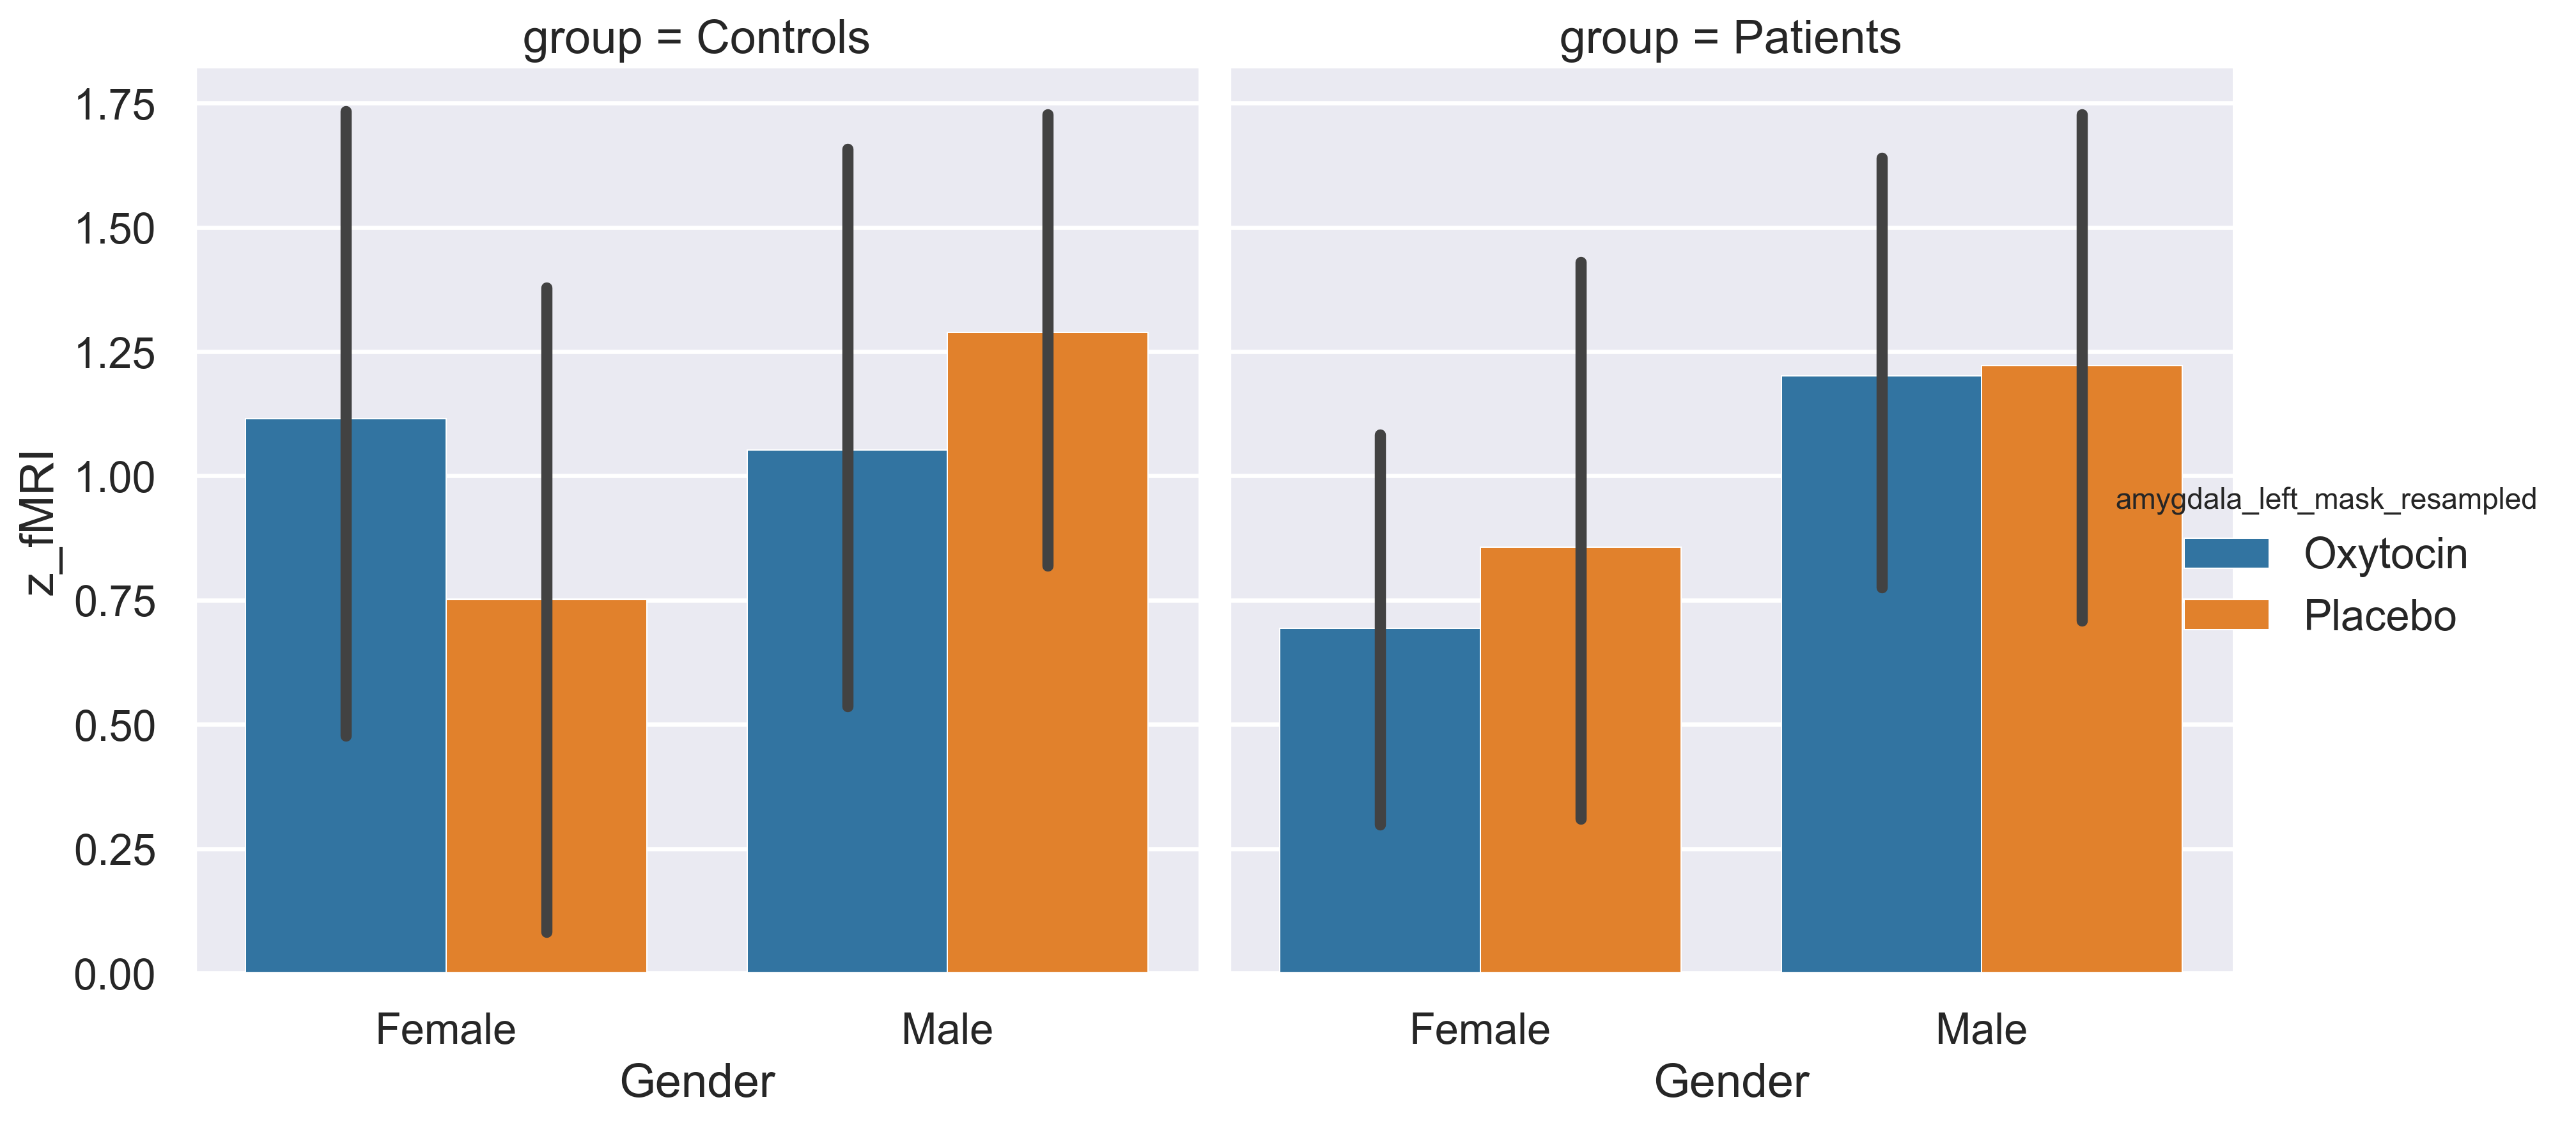

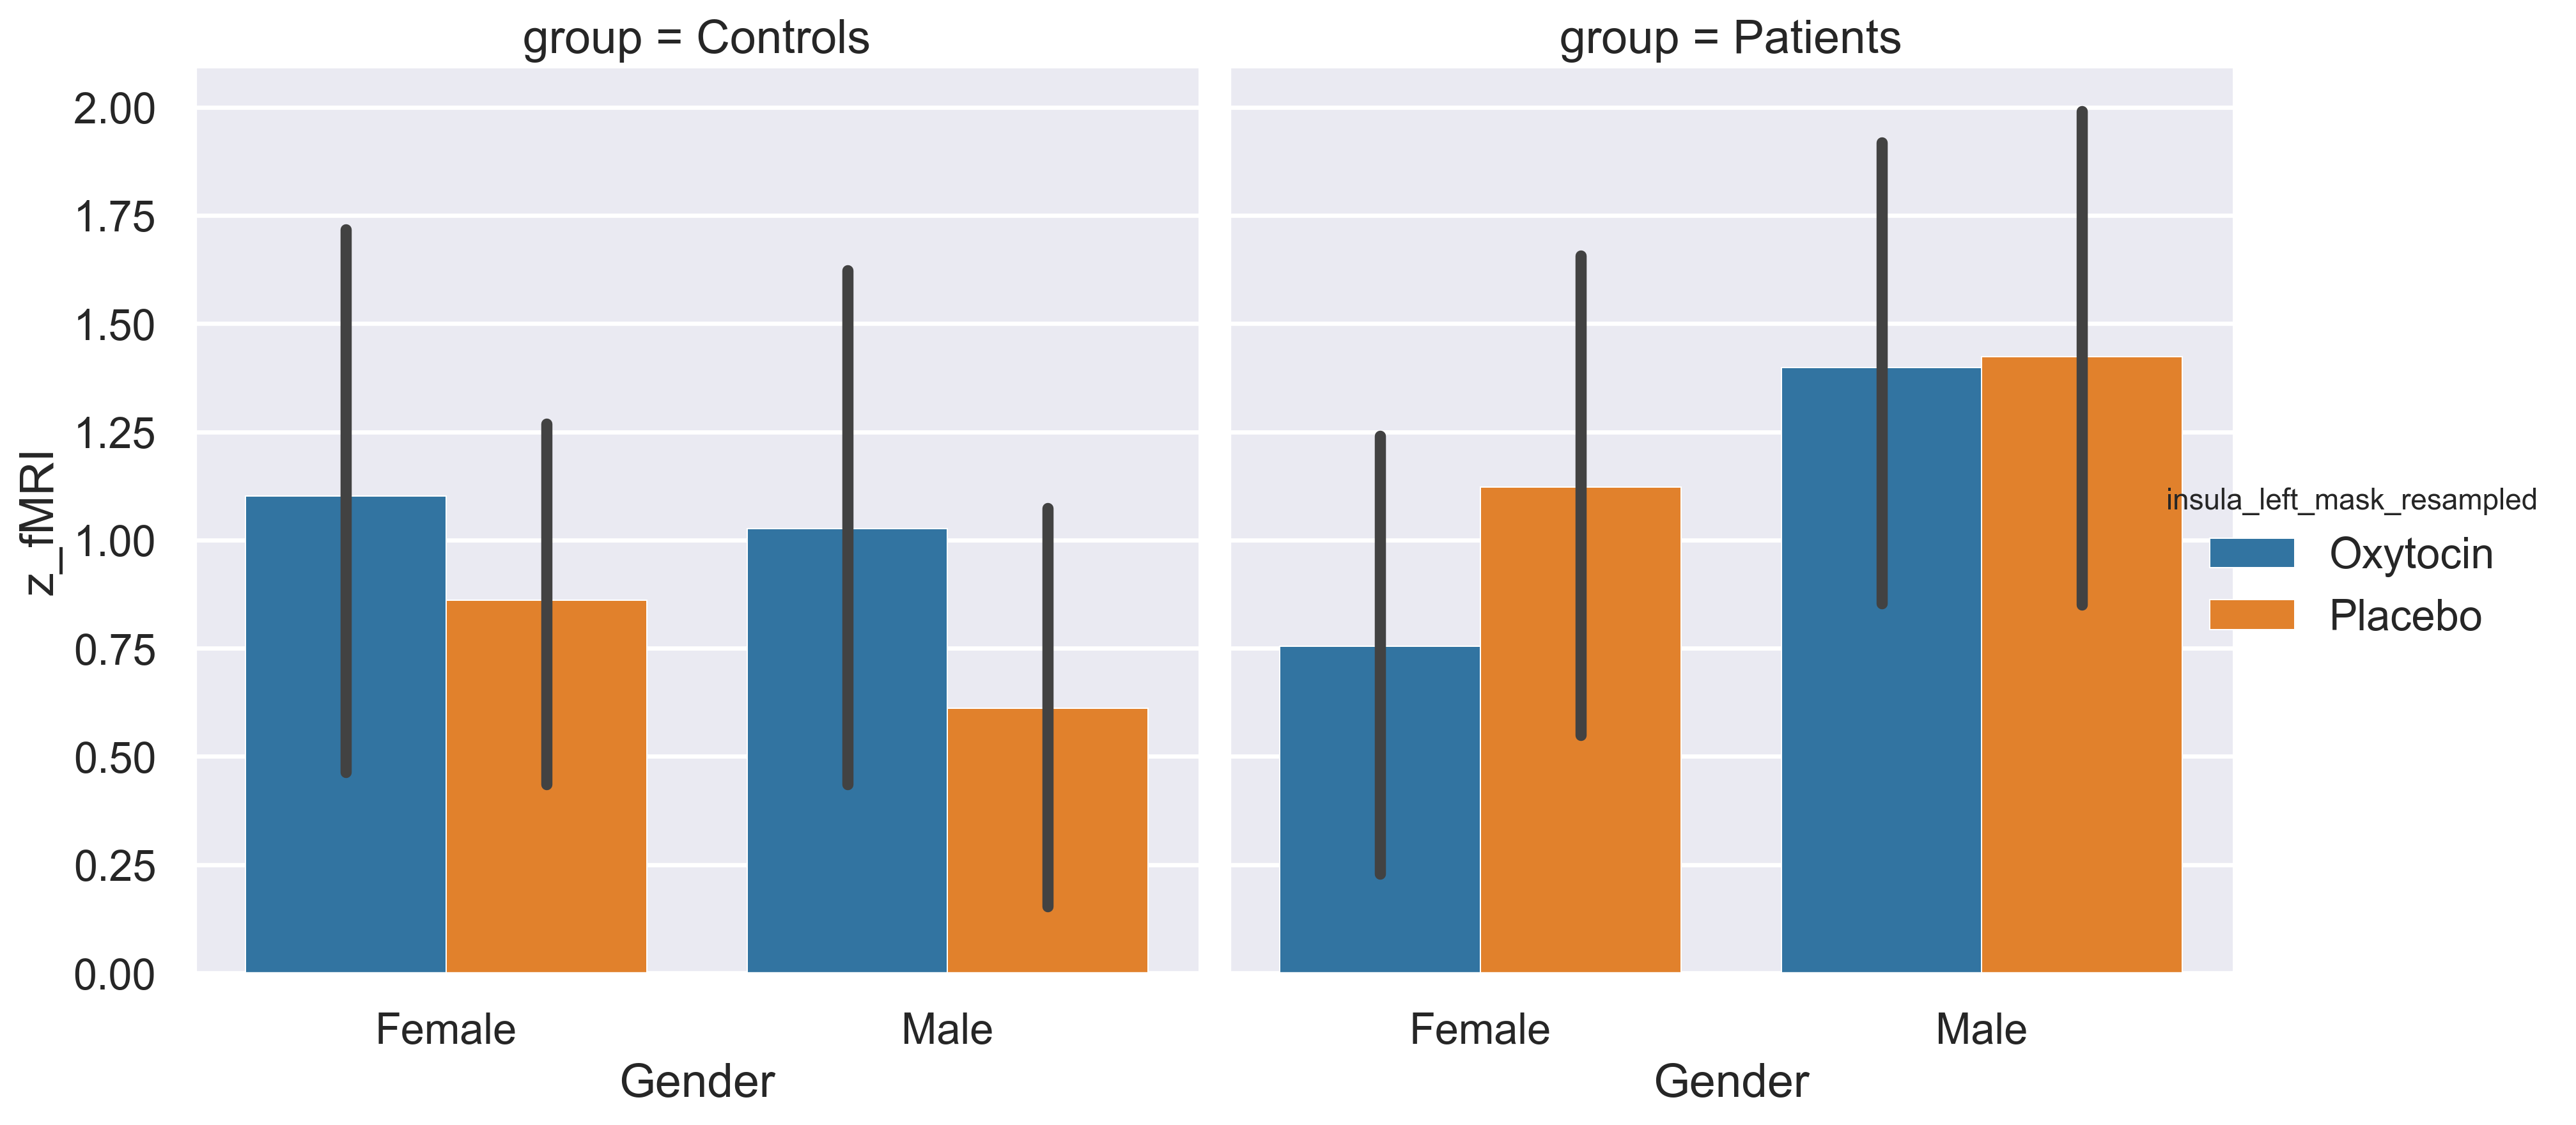

In [71]:
# extinction
for roi in df_phase2['ROI'].unique():
    print('extinction results for {}'.format(roi))
    df_tmp = df_phase2[(df_phase2['ROI'] == roi) & (df_phase2['Contrast'].isin([4,6]))].copy()
    df_tmp.loc[df_tmp['Contrast']==4, 'CS_Type'] = 'CSS'
    df_tmp.loc[df_tmp['Contrast']==6, 'CS_Type'] = 'CSR'
    df = df_tmp.pivot(index=['subID','Drug','Gender','group','Avoidance','demo_age'], columns='CS_Type', values='Mean_COPE_Value').reset_index()
    df['fMRI'] = df['CSR'] - df['CSS']
    df['z_fMRI'] = 1 + zscore(df['fMRI'])
    df['Avoidance_centered'] = df['Avoidance'] - df['Avoidance'].mean()
    
    df[['group', 'Gender','drug']] = df[['group', 'Gender' ,'Drug']].astype('category')
    
    model_ols = ols("z_fMRI ~ C(group) * C(Drug) + C(Gender) + Avoidance_centered + demo_age", data=df)
    result_ols = model_ols.fit()
    print(result_ols.summary())
    plt.style.use('seaborn-v0_8-poster')
    g = sns.catplot(x='Gender', y='z_fMRI', hue='drug', 
                    col='group', 
                    #row='drug', 
                    kind='bar', 
                    #hue_order=['CSS', 'CSR'],
                    height=6, aspect=1,
                    data=df)
    g.legend.set_title(f'{roi}')
    g.figure.set_dpi(300)
    # t-test: ?> 0
    results = []
    for (group, drug, gender), sub_df in df.groupby(['group', 'Drug', 'Gender'], observed=True):
        t_stat, p_value = stats.ttest_1samp(sub_df['z_fMRI'], 0, nan_policy='omit')  # Ignore NaNs
        
        results.append({
            'Group': group,
            'Drug': drug,
            'Gender': gender,
            't_stat': t_stat,
            'p_value': p_value,
            'n': len(sub_df)  # Sample size
        })
    df_results = pd.DataFrame(results)
    df_results['p_value_corrected'] = multipletests(df_results['p_value'], method='fdr_bh')[1]
    print(df_results)


extinction results for hippocampus_right_mask_resampled
                            OLS Regression Results                            
Dep. Variable:                 z_fMRI   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.044
Method:                 Least Squares   F-statistic:                    0.3029
Date:                Tue, 11 Mar 2025   Prob (F-statistic):              0.934
Time:                        11:00:50   Log-Likelihood:                -142.35
No. Observations:                 101   AIC:                             298.7
Df Residuals:                      94   BIC:                             317.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

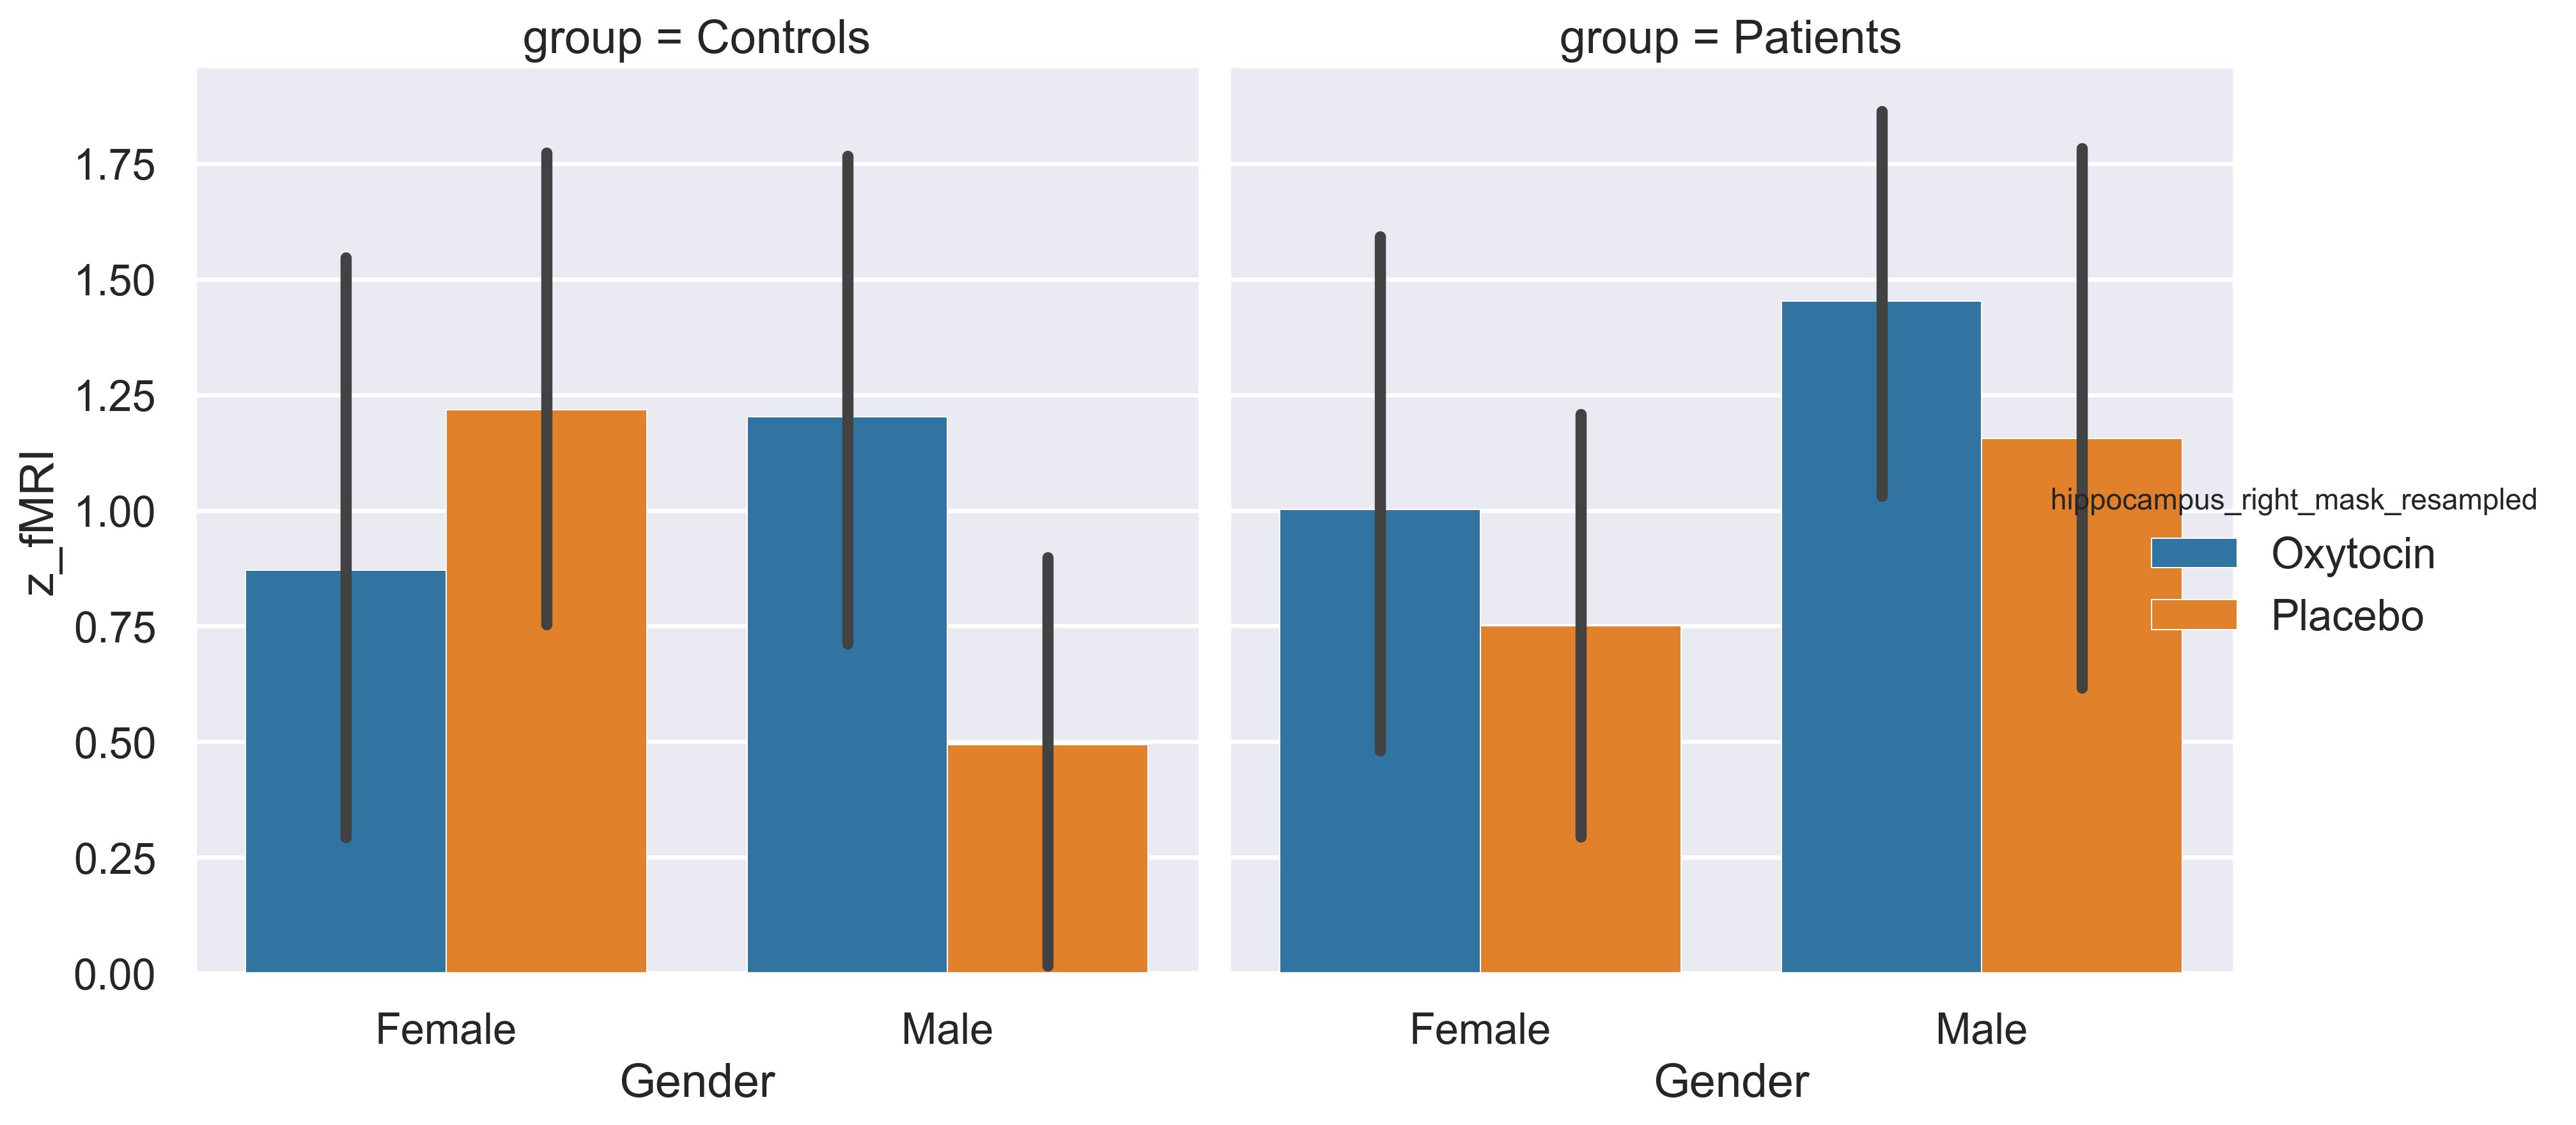

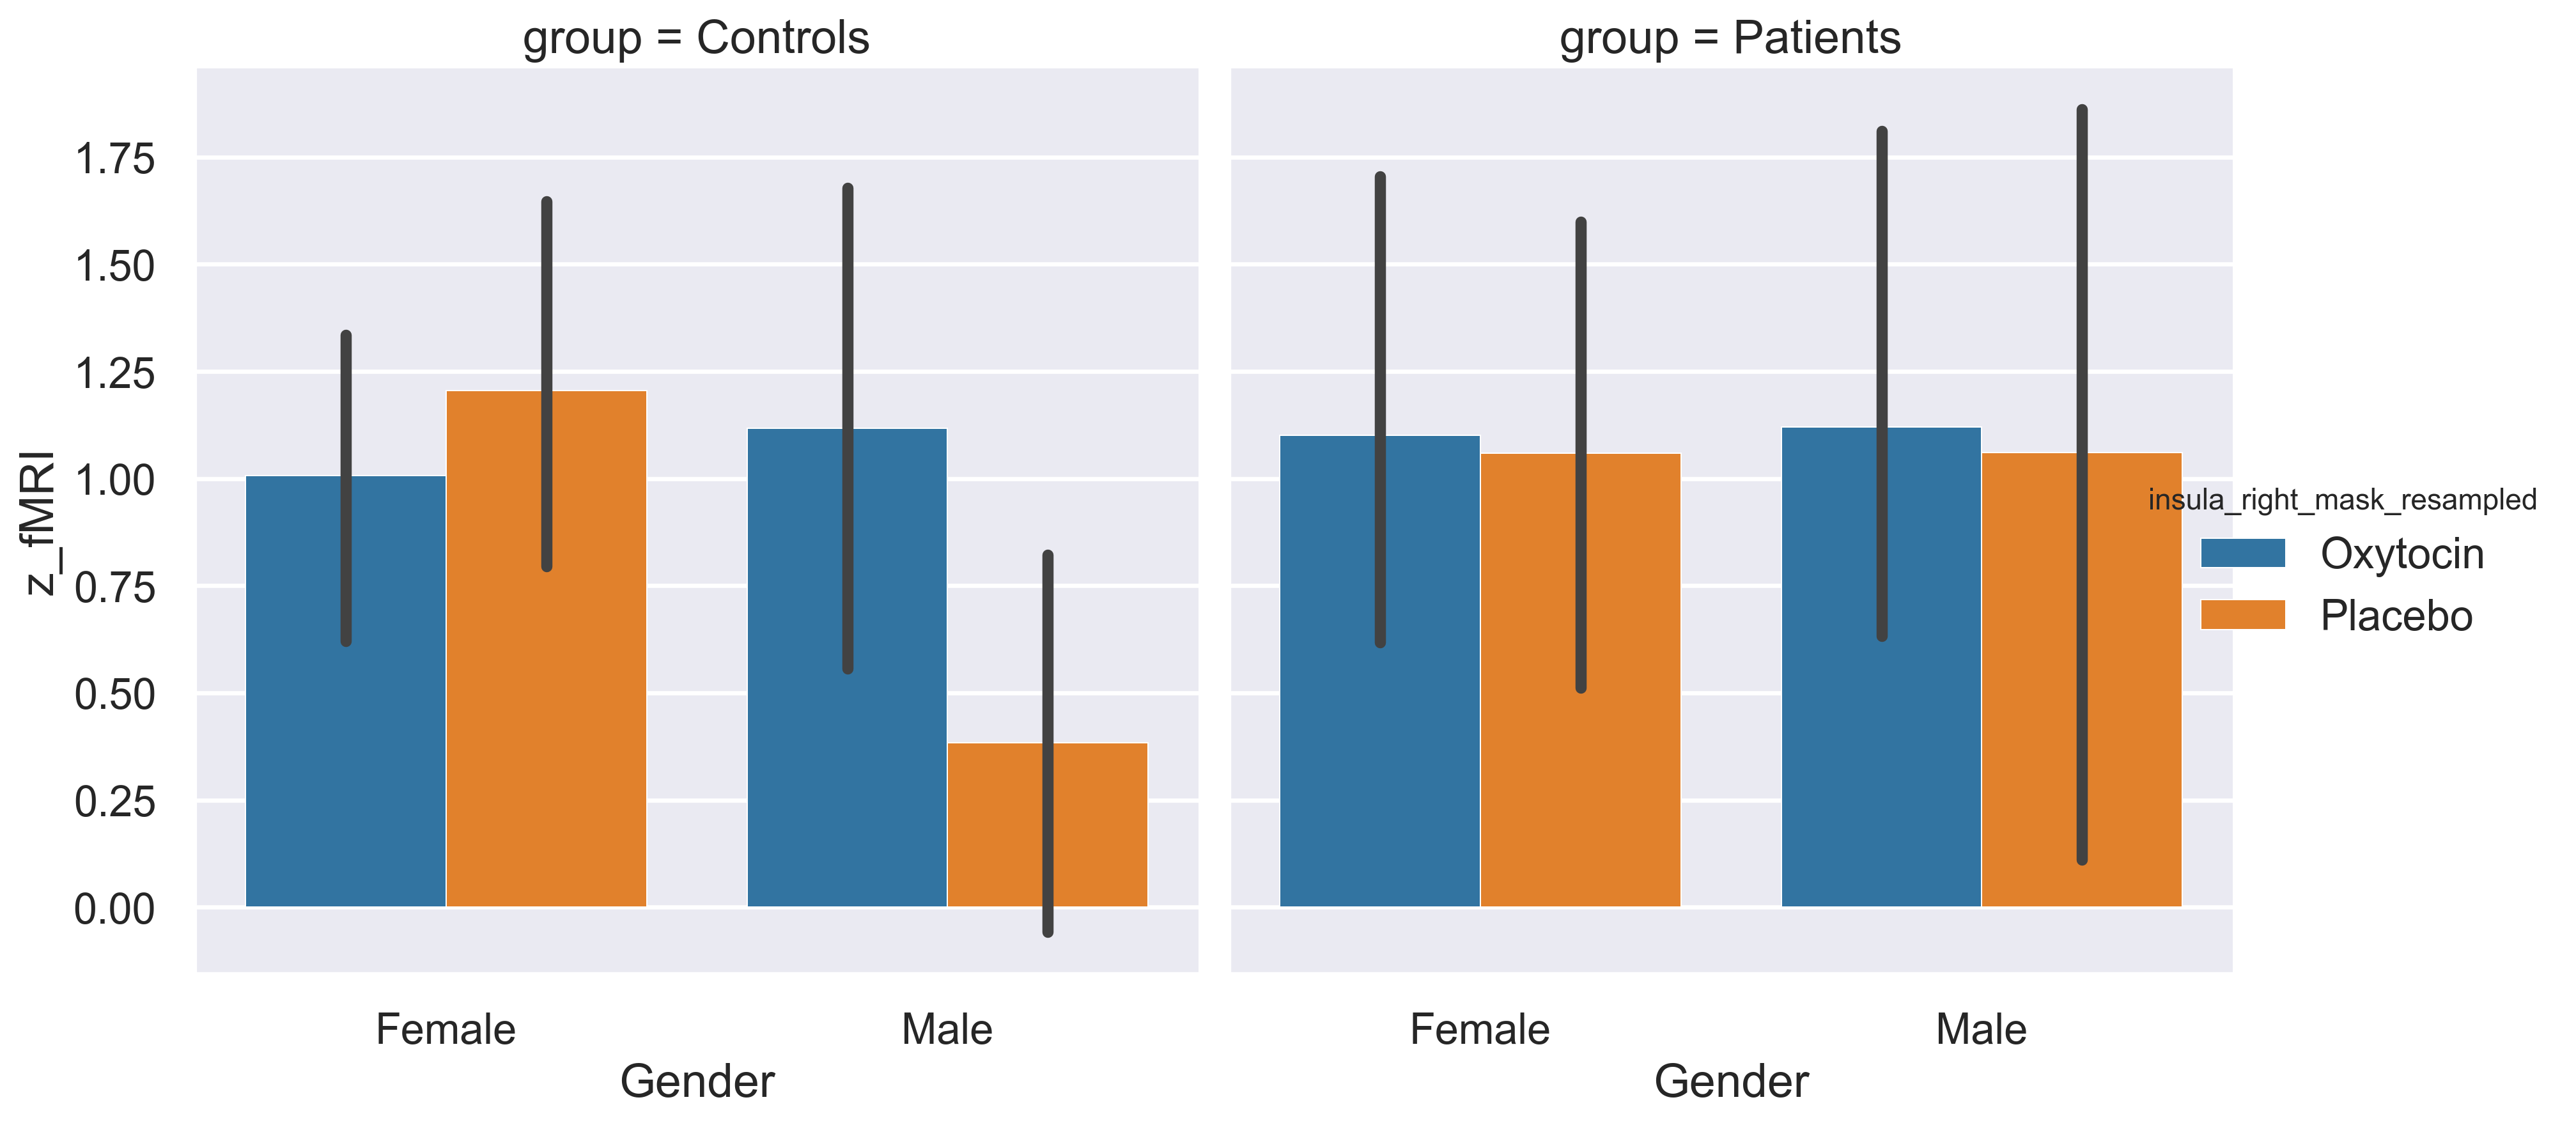

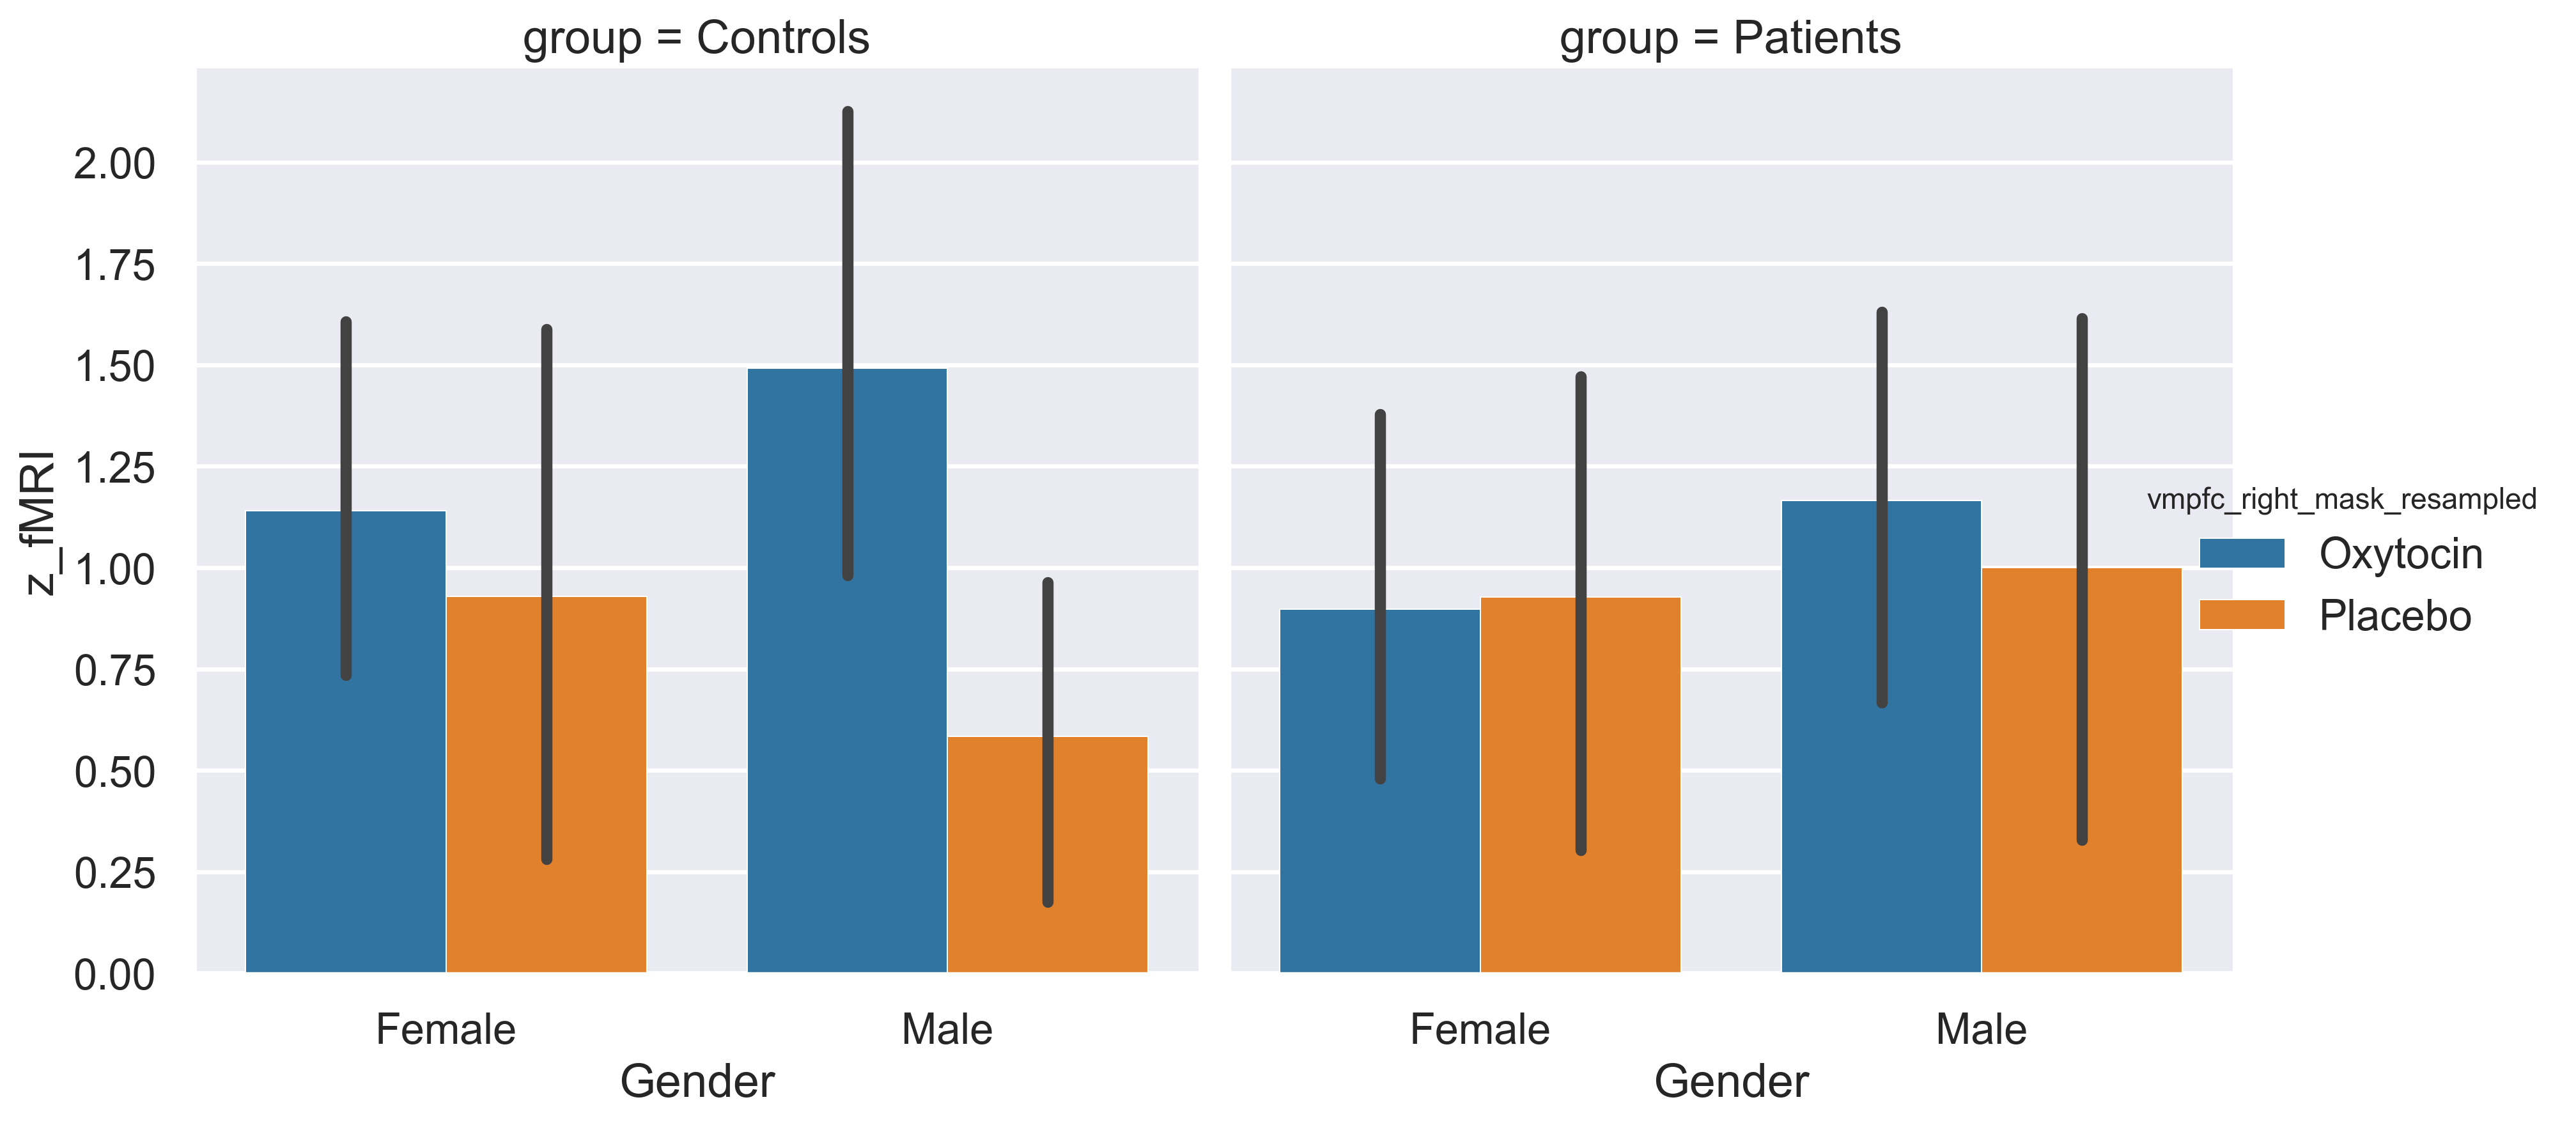

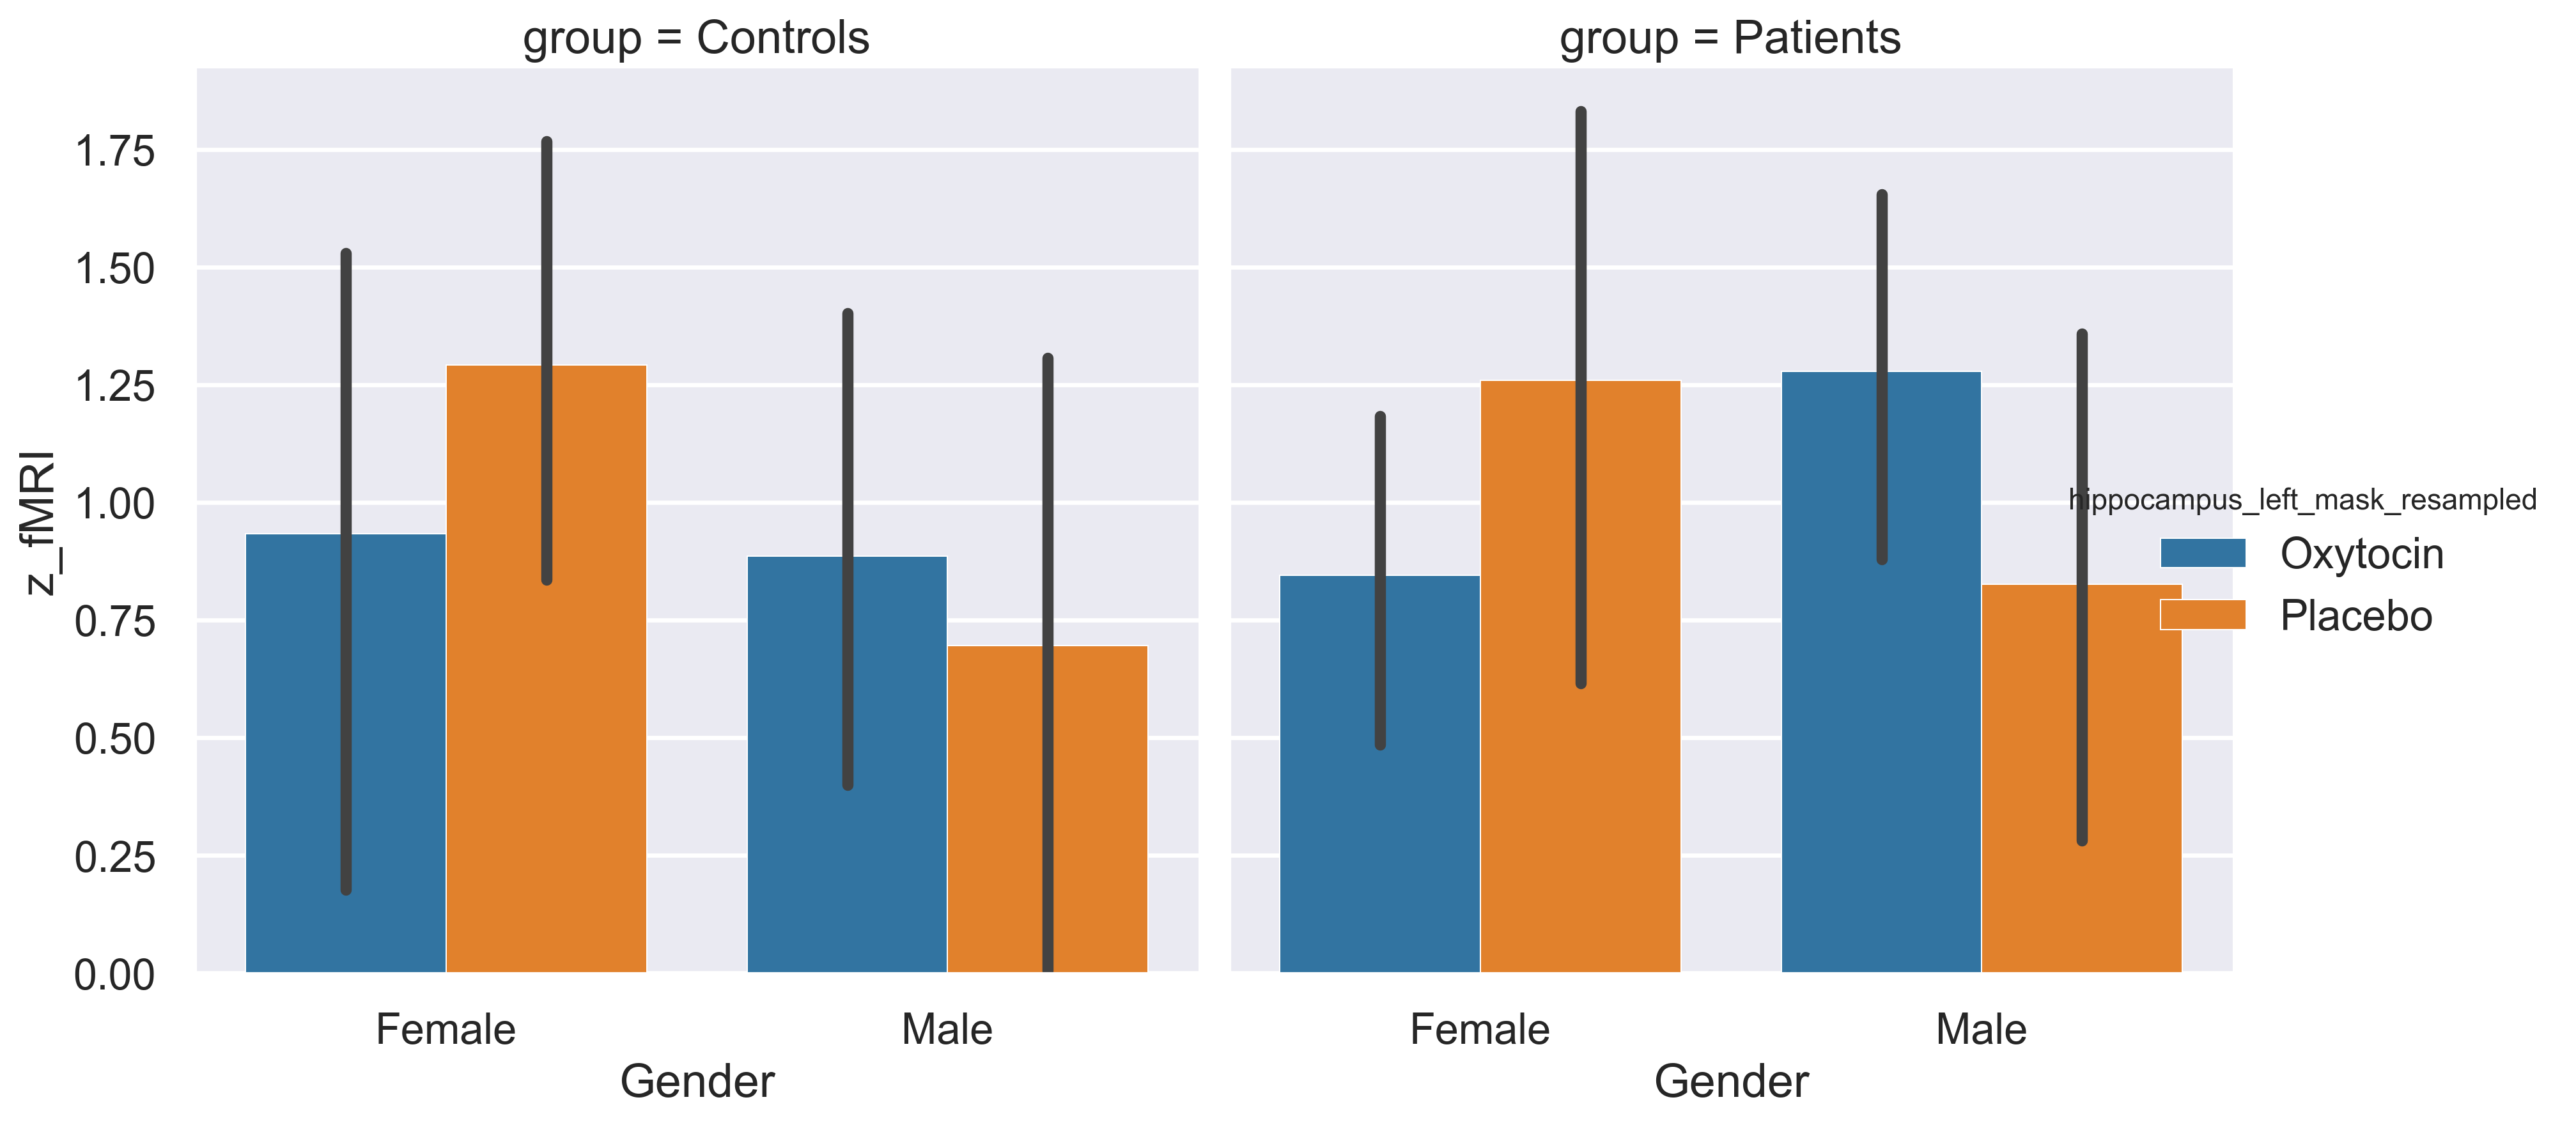

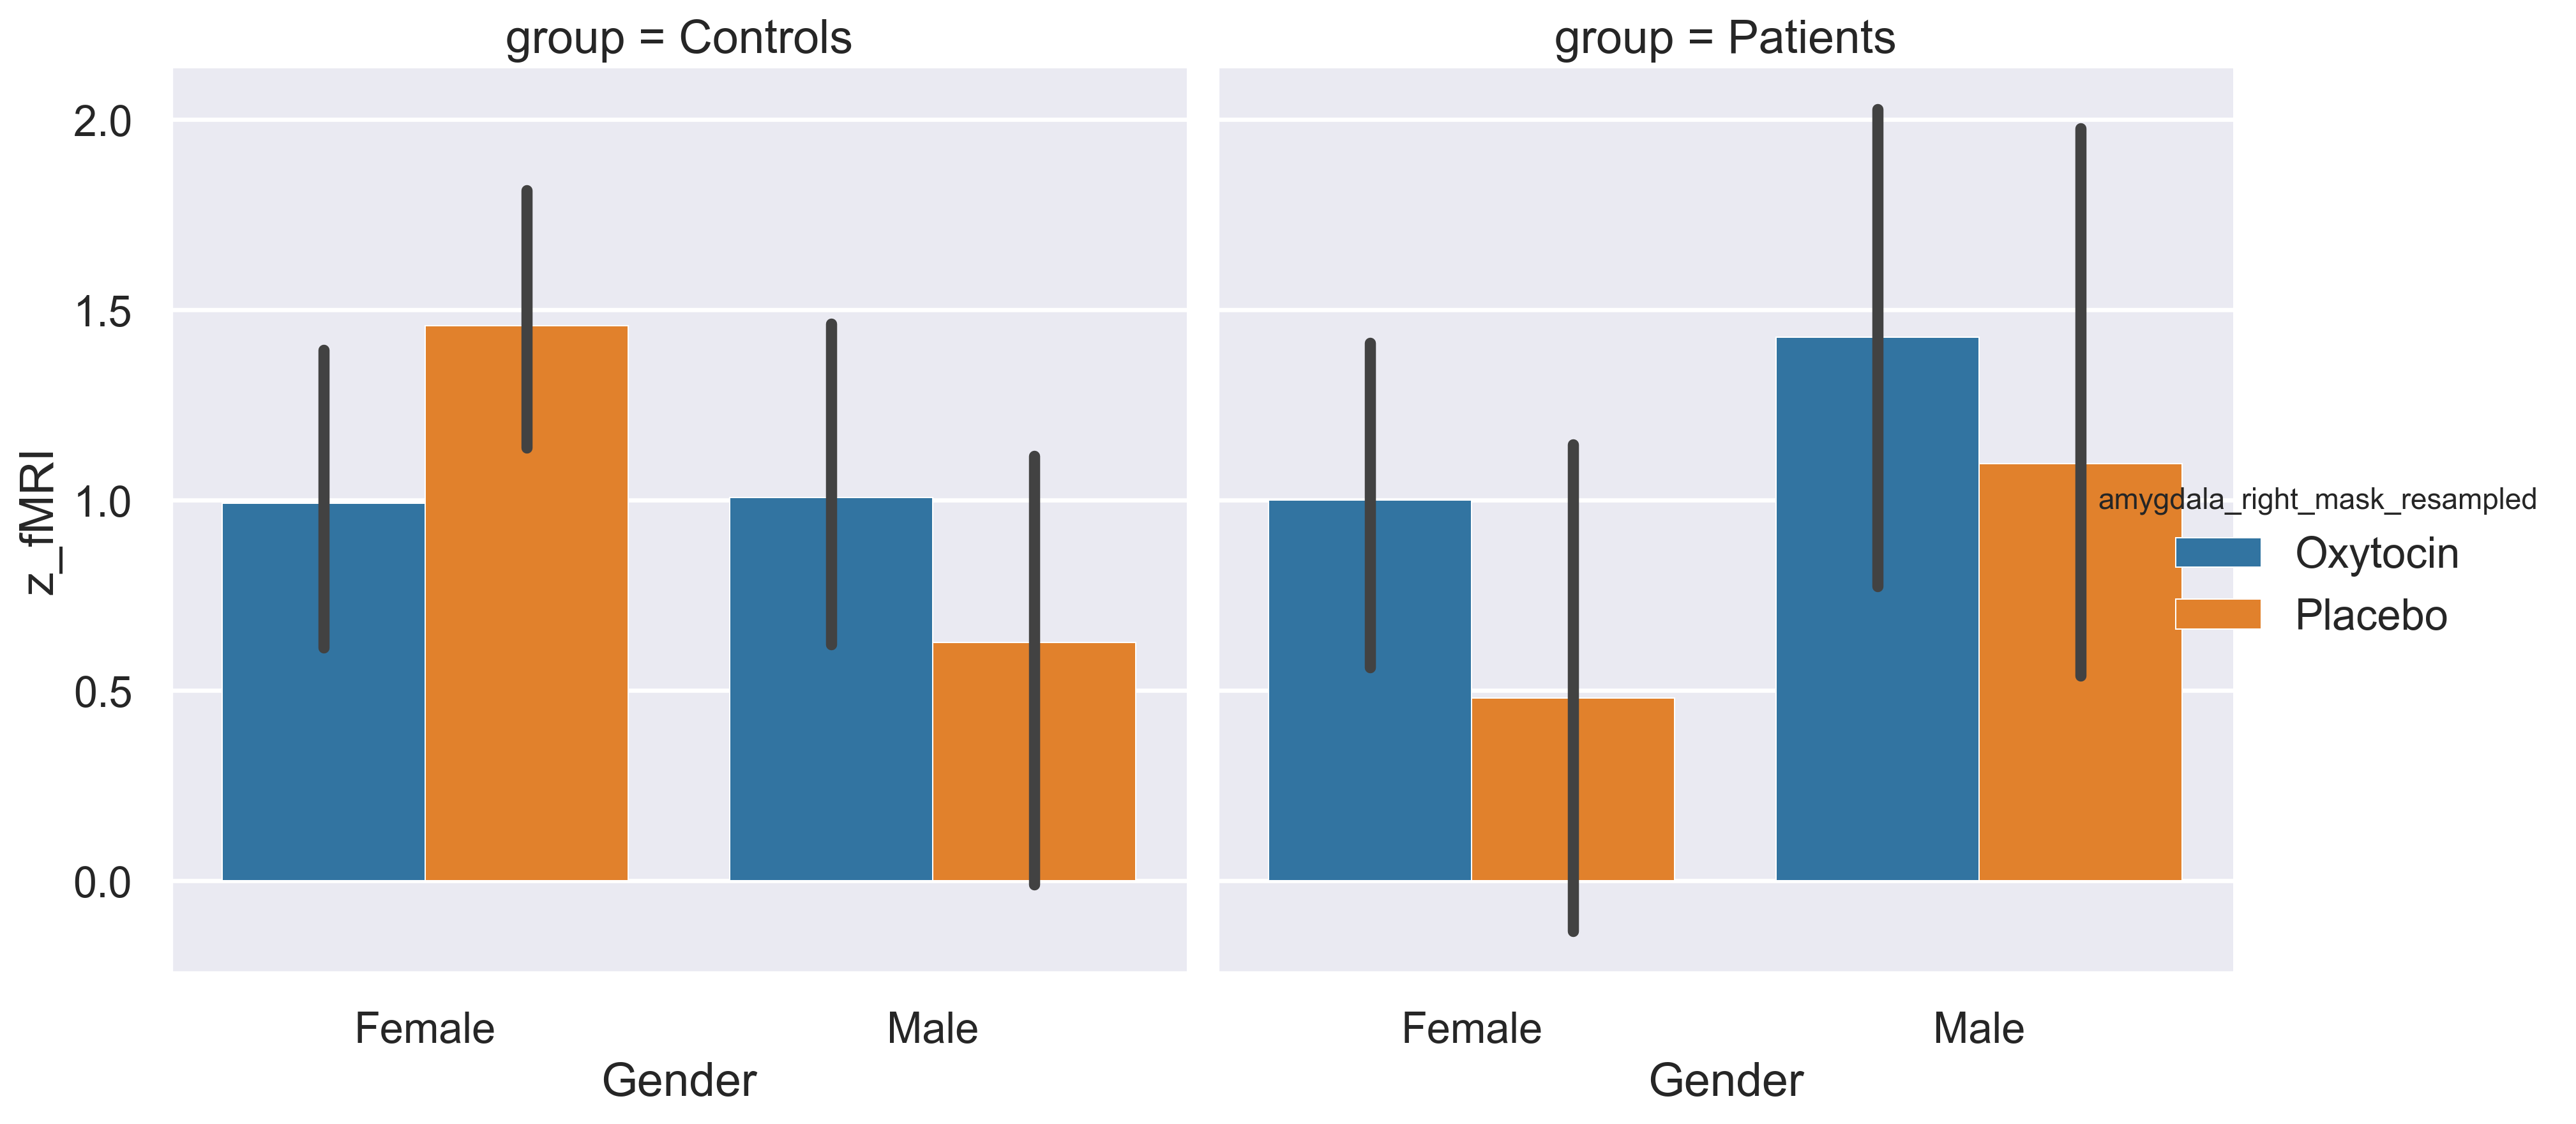

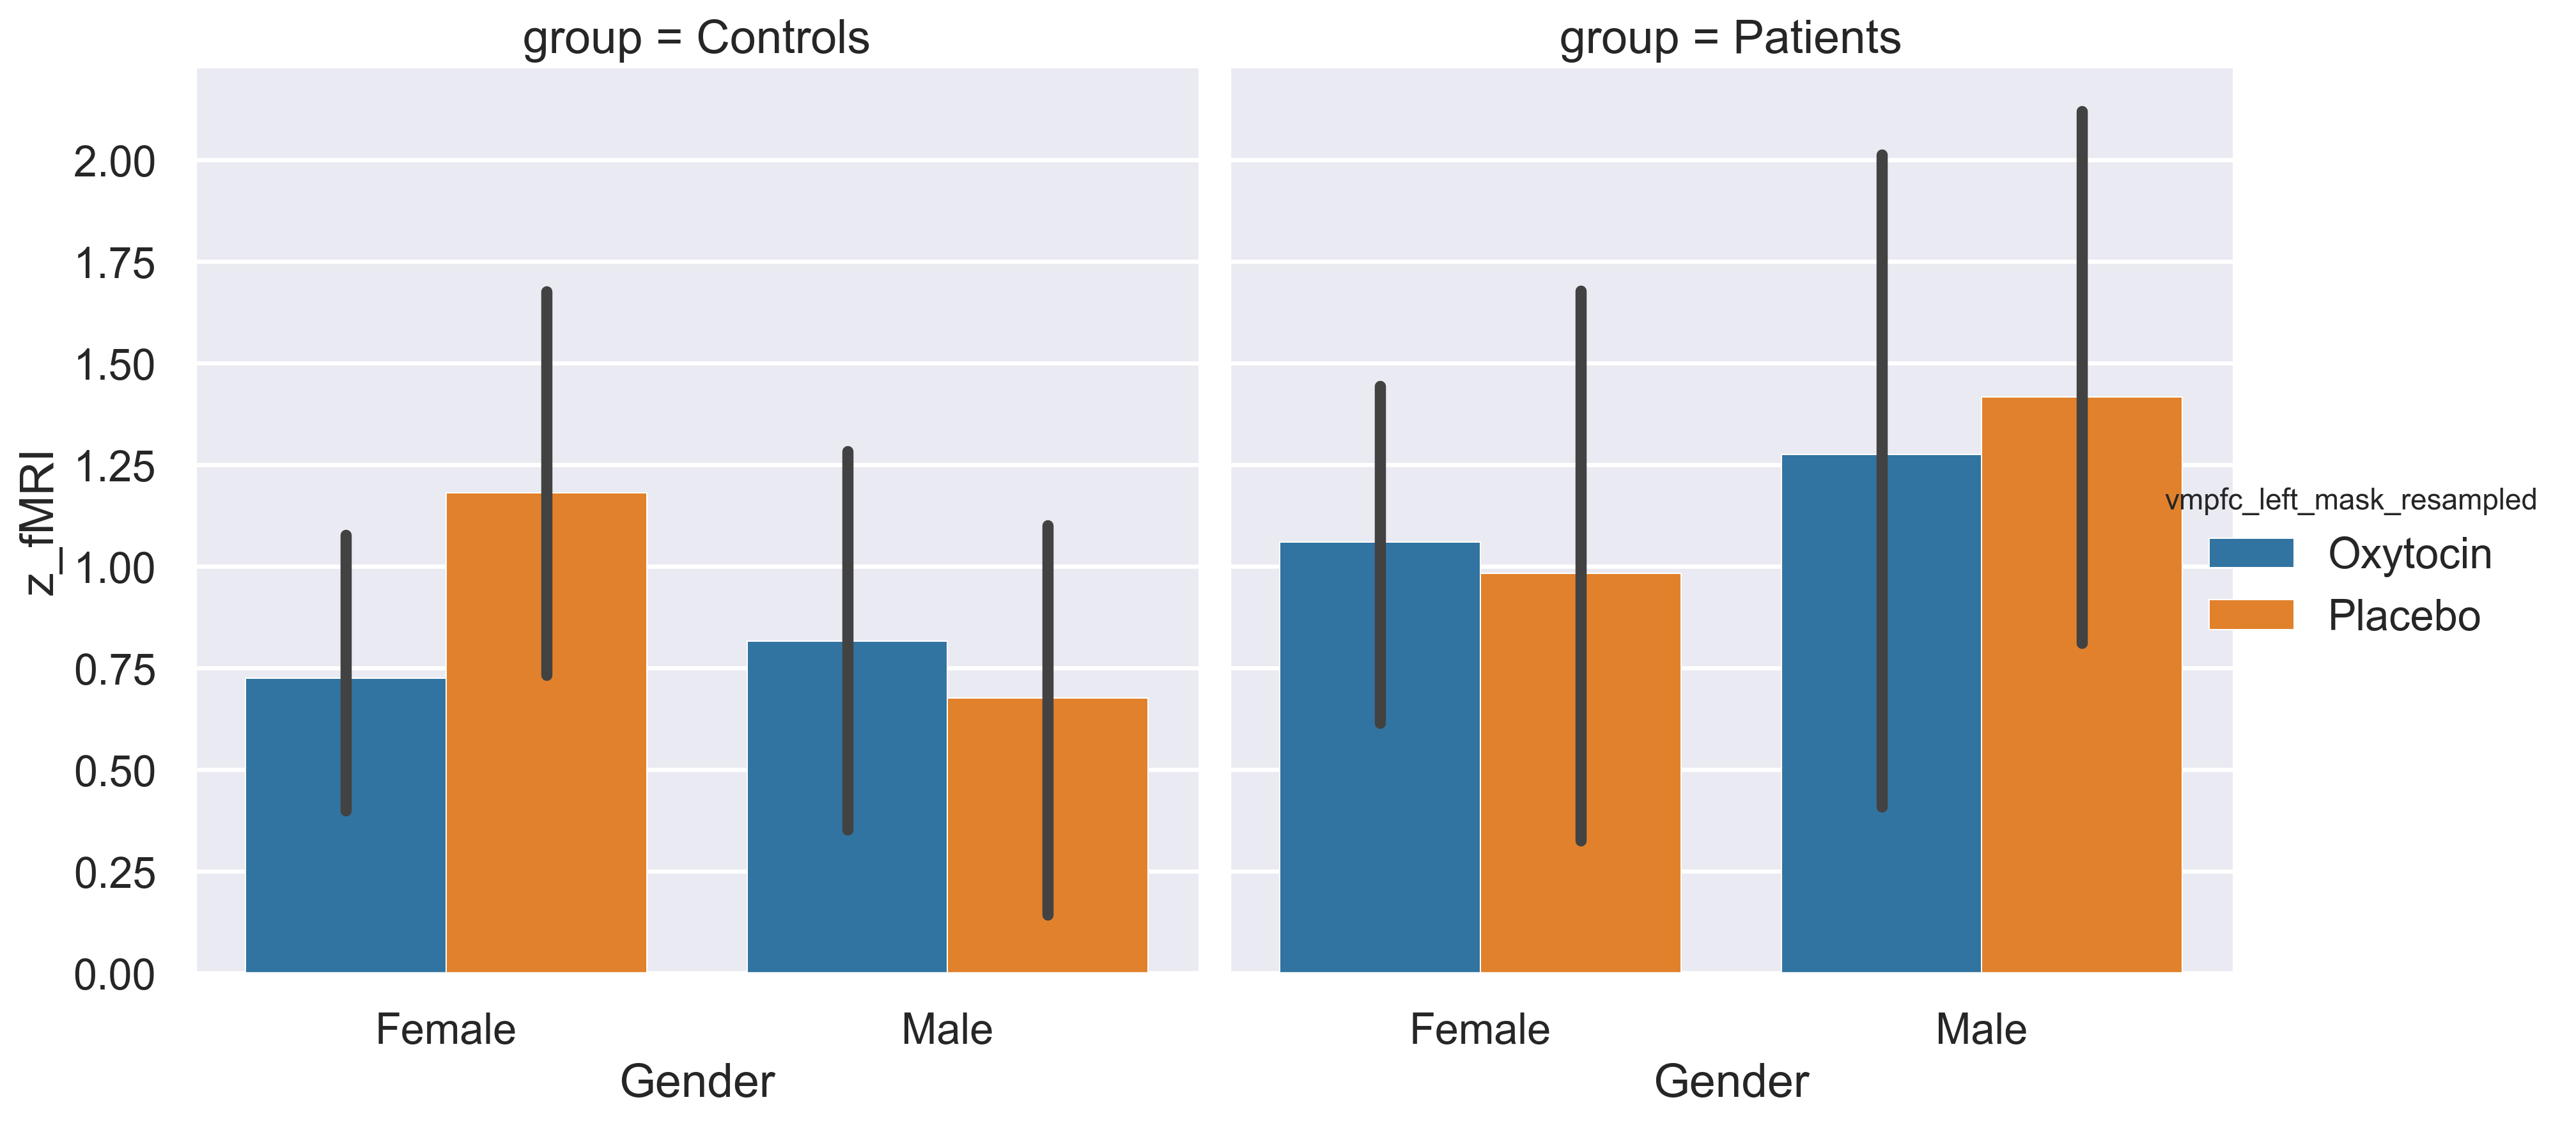

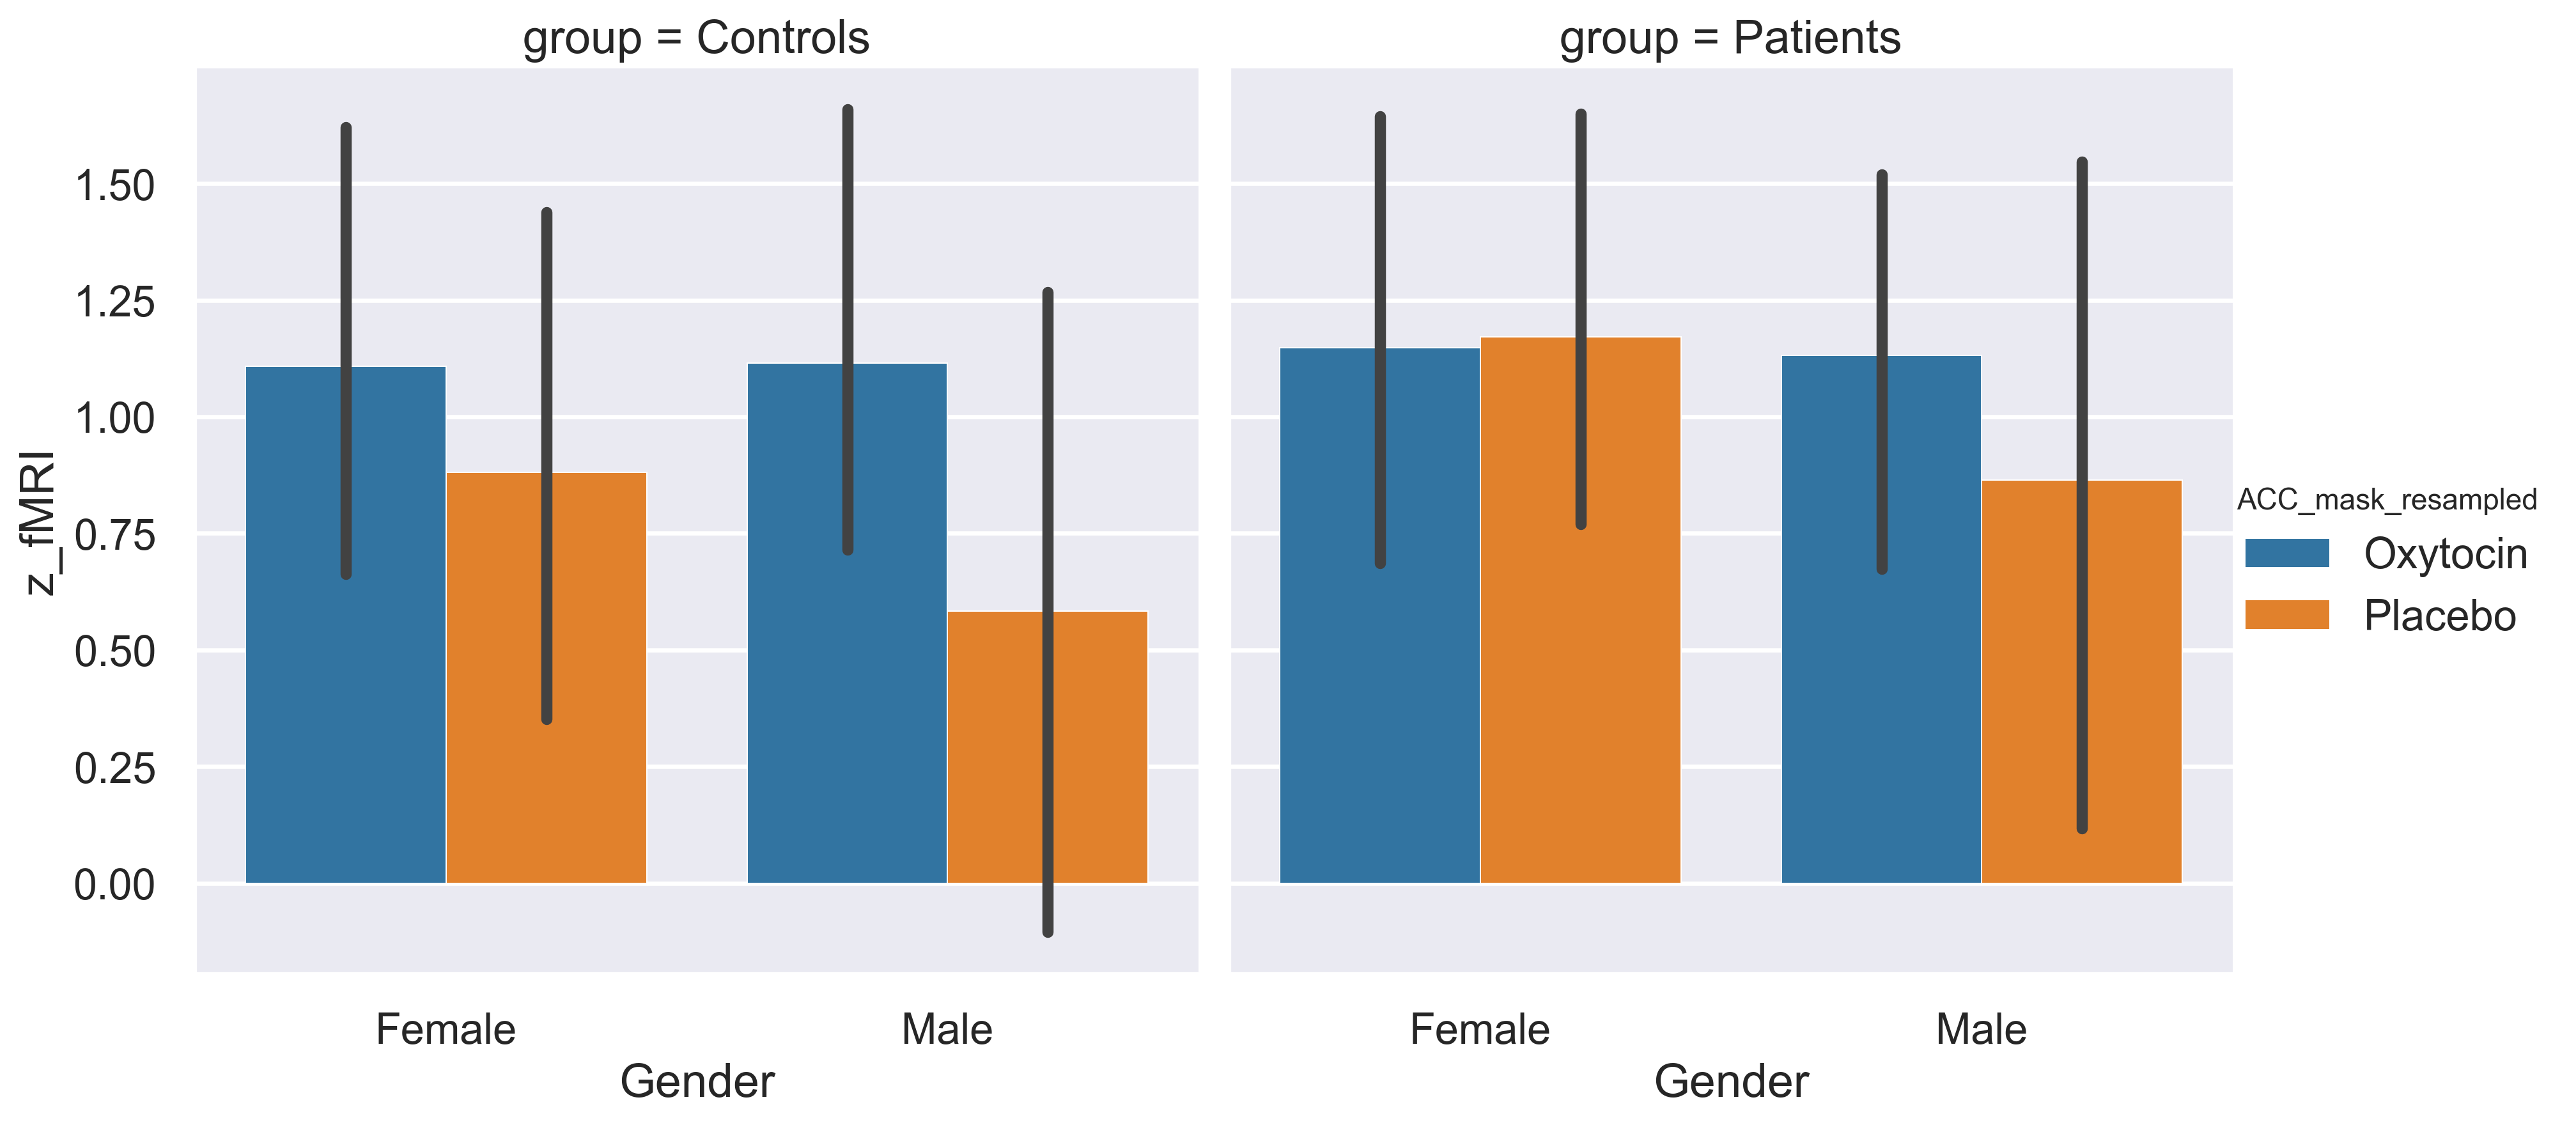

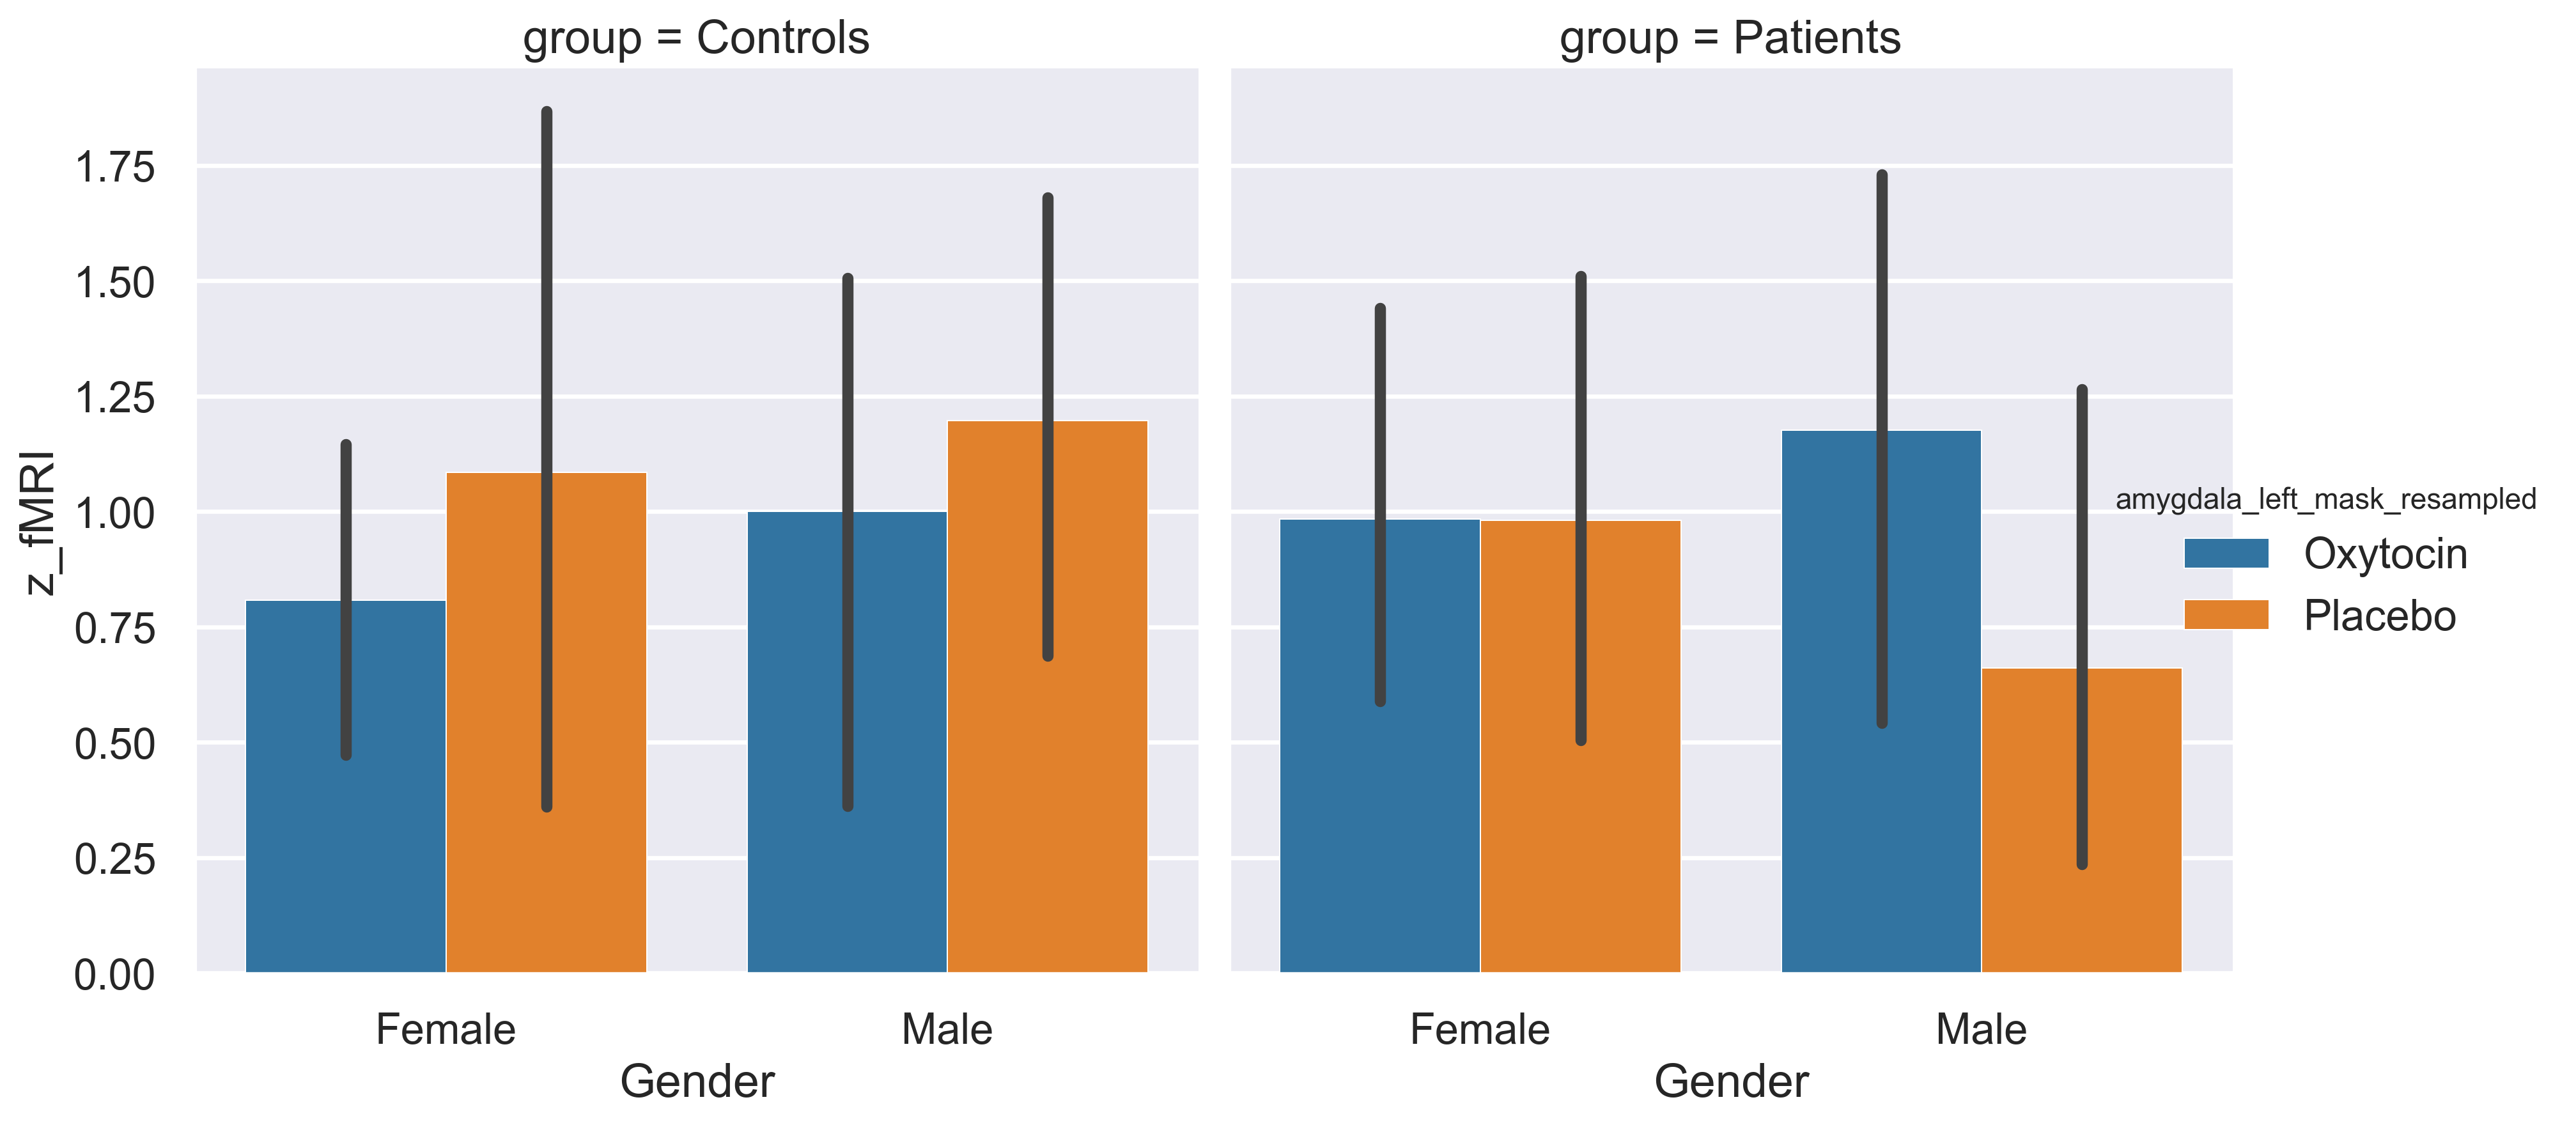

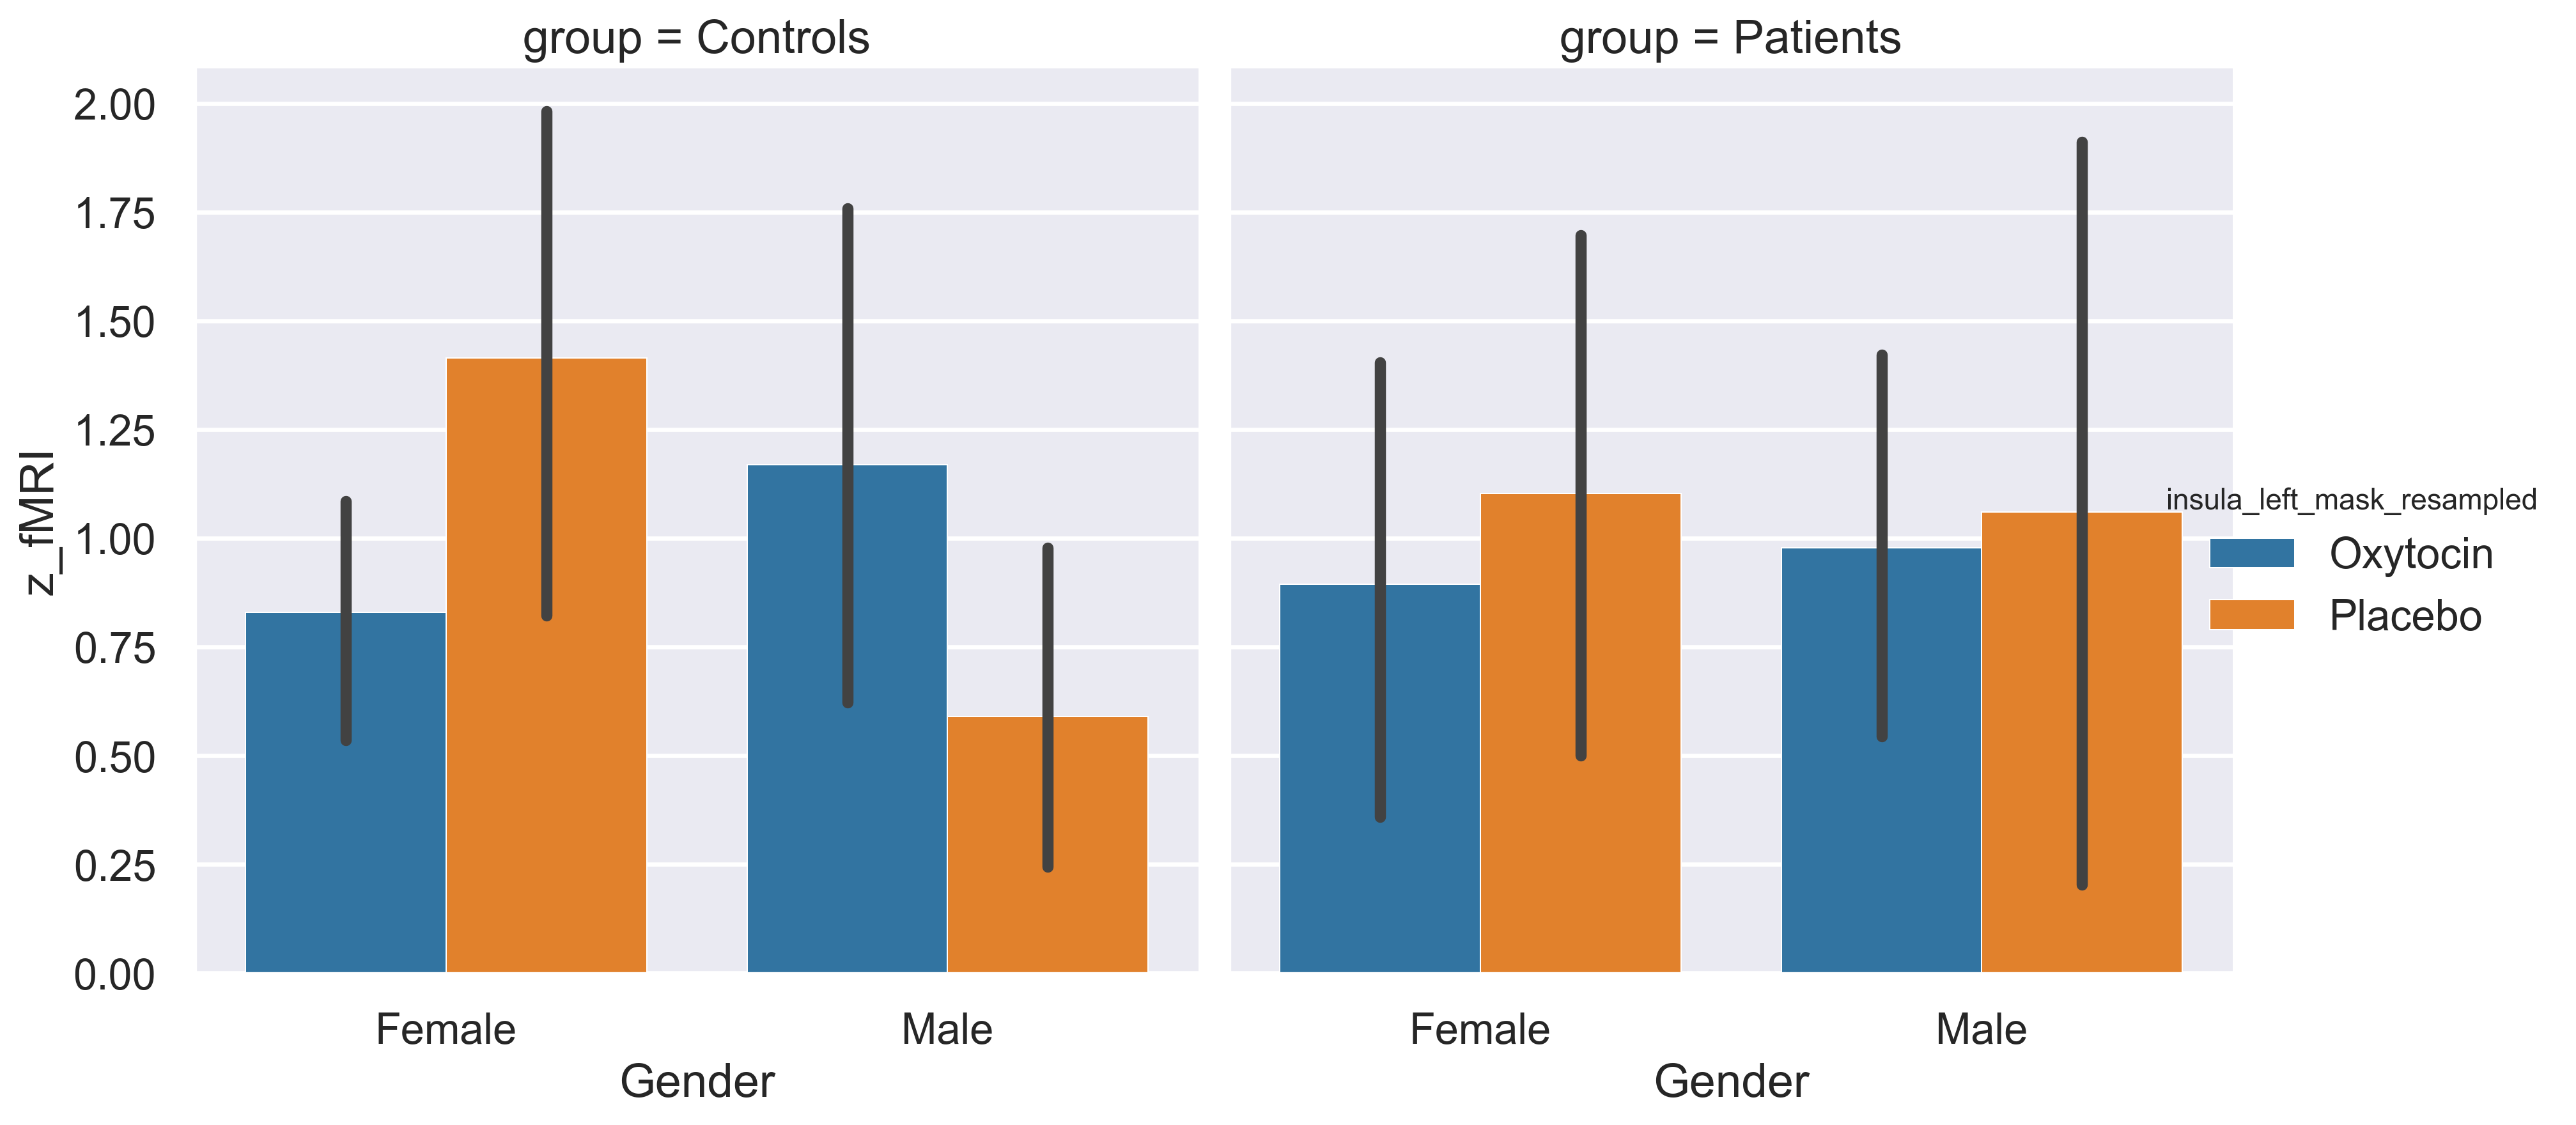

In [72]:
# reinstatement
for roi in df_phase3['ROI'].unique():
    print('extinction results for {}'.format(roi))
    df_tmp = df_phase3[(df_phase2['ROI'] == roi) & (df_phase3['Contrast'].isin([4,6]))].copy()
    df_tmp.loc[df_tmp['Contrast']==4, 'CS_Type'] = 'CSS'
    df_tmp.loc[df_tmp['Contrast']==6, 'CS_Type'] = 'CSR'
    df = df_tmp.pivot(index=['subID','Drug','Gender','group','Avoidance','demo_age'], columns='CS_Type', values='Mean_COPE_Value').reset_index()
    df['fMRI'] = df['CSR'] - df['CSS']
    df['z_fMRI'] = 1 + zscore(df['fMRI'])
    df['Avoidance_centered'] = df['Avoidance'] - df['Avoidance'].mean()
    
    df[['group', 'Gender','drug']] = df[['group', 'Gender' ,'Drug']].astype('category')
    
    model_ols = ols("z_fMRI ~ C(group) * C(Drug) + C(Gender) + Avoidance_centered + demo_age", data=df)
    result_ols = model_ols.fit()
    print(result_ols.summary())
    plt.style.use('seaborn-v0_8-poster')
    g = sns.catplot(x='Gender', y='z_fMRI', hue='drug', 
                    col='group', 
                    #row='drug', 
                    kind='bar', 
                    #hue_order=['CSS', 'CSR'],
                    height=6, aspect=1,
                    data=df)
    g.legend.set_title(f'{roi}')
    g.figure.set_dpi(300)
    # t-test: ?> 0
    results = []
    for (group, drug, gender), sub_df in df.groupby(['group', 'Drug', 'Gender'], observed=True):
        t_stat, p_value = stats.ttest_1samp(sub_df['z_fMRI'], 0, nan_policy='omit')  # Ignore NaNs
        
        results.append({
            'Group': group,
            'Drug': drug,
            'Gender': gender,
            't_stat': t_stat,
            'p_value': p_value,
            'n': len(sub_df)  # Sample size
        })
    df_results = pd.DataFrame(results)
    df_results['p_value_corrected'] = multipletests(df_results['p_value'], method='fdr_bh')[1]
    print(df_results)